**Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest , f_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


**Exploring the Dataset**

In [2]:
data_test=pd.read_csv("test.csv")
data_train= pd.read_csv("train.csv")

In [3]:
data_test.head(5)

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.674302         -0.894088  ...                        -0.705974   
1         -0.945823         -0.894088  ...                        -0.594944   
2         -0.963483         -0.939260  ...                        -0.640736   
3         -0.968897         -0.938610  ...                        -0.736124   
4         -0.977346         -0.938610  ...                        -0.846595   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                     0.006462                              0.162920   
1                    -0.083495                              0.017500   
2                    -0.034956                              0.202302   
3                    -0.017067                              0.154438   
4                    -0.002223                             -0.040046   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.825886                              0.271151   
1                         -0.434375                              0.920593   
2                          0.064103                              0.145068   
3                          0.340134                              0.296407   
4                          0.736715                             -0.118545   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.720009              0.276801             -0.057978        2   
1             -0.698091              0.281343             -0.083898        2   
2             -0.702771              0.280083             -0.079346        2   
3             -0.698954              0.284114             -0.077108        2   
4             -0.692245              0.290722             -0.073857        2   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  

[5 rows x 563 columns]

In [4]:
data_train.head(5)

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.923527         -0.934724  ...                        -0.710304   
1         -0.957686         -0.943068  ...                        -0.861499   
2         -0.977469         -0.938692  ...                        -0.760104   
3         -0.989302         -0.938692  ...                        -0.482845   
4         -0.990441         -0.942469  ...                        -0.699205   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.112754                              0.030400   
1                     0.053477                             -0.007435   
2                    -0.118559                              0.177899   
3                    -0.036788                             -0.012892   
4                     0.123320                              0.122542   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.464761                             -0.018446   
1                         -0.732626                              0.703511   
2                          0.100699                              0.808529   
3                          0.640011                             -0.485366   
4                          0.693578                             -0.615971   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.841247              0.179941             -0.058627        1   
1             -0.844788              0.180289             -0.054317        1   
2             -0.848933              0.180637             -0.049118        1   
3             -0.848649              0.181935             -0.047663        1   
4             -0.847865              0.185151             -0.043892        1   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  

[5 rows x 563 columns]

In [5]:
data_train.shape

(7352, 563)

In [6]:
data_test.shape

(2947, 563)

In [7]:
data_train.shape

(7352, 563)

In [8]:
data_train.tail()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
7347         -0.195387          0.039905          0.077078         -0.282301   
7348         -0.235309          0.004816          0.059280         -0.322552   
7349         -0.218218         -0.103822          0.274533         -0.304515   
7350         -0.219139         -0.111412          0.268893         -0.310487   
7351         -0.269270         -0.087212          0.177404         -0.377404   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
7347          0.043616          0.060410          0.210795  ...   
7348         -0.029456          0.080585          0.117440  ...   
7349         -0.098913          0.332584          0.043999  ...   
7350         -0.068200          0.319473          0.101702  ...   
7351         -0.038678          0.229430          0.269013  ...   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
7347                        -0.880324                    -0.190437   
7348                        -0.680744                     0.064907   
7349                        -0.304029                     0.052806   
7350                        -0.344314                    -0.101360   
7351                        -0.740738                    -0.280088   

      angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
7347                              0.829718                          0.206972   
7348                              0.875679                         -0.879033   
7349                             -0.266724                          0.864404   
7350                              0.700740                          0.936674   
7351                             -0.007739                         -0.056088   

      angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
7347                             -0.425619             -0.791883   
7348                              0.400219             -0.771840   
7349                              0.701169             -0.779133   
7350                             -0.589479             -0.785181   
7351                             -0.616956             -0.783267   

      angle(Y,gravityMean)  angle(Z,gravityMean)  subject          Activity  
7347              0.238604              0.049819       30  WALKING_UPSTAIRS  
7348              0.252676              0.050053       30  WALKING_UPSTAIRS  
7349              0.249145              0.040811       30  WALKING_UPSTAIRS  
7350              0.246432              0.025339       30  WALKING_UPSTAIRS  
7351              0.246809              0.036695       30  WALKING_UPSTAIRS  

[5 rows x 563 columns]

In [9]:
data_train.describe()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0.999873         -1.000000         -1.000000   
25%           -0.992754         -0.978129         -0.980233         -0.993591   
50%           -0.946196         -0.851897         -0.859365         -0.950709   
75%           -0.242813         -0.034231         -0.262415         -0.292680   
max            1.000000          0.916238          1.000000          1.000000   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
count       7352.000000       7352.000000       7352.000000  ...   
mean          -0.526907         -0.606150         -0.468604  ...   
std            0.485942          0.414122          0.544547  ...   
min           -1.000000         -1.000000         -1.000000  ...   
25%           -0.978162         -0.980251         -0.936219  ...   
50%           -0.857328         -0.857143         -0.881637  ...   
75%           -0.066701         -0.265671         -0.017129  ...   
max            0.967664          1.000000          1.000000  ...   

       fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
count                      7352.000000                      7352.000000   
mean                         -0.307009                        -0.625294   
std                           0.321011                         0.307584   
min                          -0.995357                        -0.999765   
25%                          -0.542602                        -0.845573   
50%                          -0.343685                        -0.711692   
75%                          -0.126979                        -0.503878   
max                           0.989538                         0.956845   

       angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
count                  7352.000000                           7352.000000   
mean                      0.008684                              0.002186   
std                       0.336787                              0.448306   
min                      -0.976580                             -1.000000   
25%                      -0.121527                             -0.289549   
50%                       0.009509                              0.008943   
75%                       0.150865                              0.292861   
max                       1.000000                              1.000000   

       angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
count                       7352.000000                           7352.000000   
mean                           0.008726                             -0.005981   
std                            0.608303                              0.477975   
min                           -1.000000                             -1.000000   
25%                           -0.482273                             -0.376341   
50%                            0.008735                             -0.000368   
75%                            0.506187                              0.359368   
max                            0.998702                     

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [11]:
data_train.describe(percentiles=[.25,.5,.75,.90,.95,.99])

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
90%             0.337501           0.004936          -0.069998   
95%             0.374708           0.017749          -0.047516   
99%             0.444999           0.067006           0.036919   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0.999873         -1.000000         -1.000000   
25%           -0.992754         -0.978129         -0.980233         -0.993591   
50%           -0.946196         -0.851897         -0.859365         -0.950709   
75%           -0.242813         -0.034231         -0.262415         -0.292680   
90%            0.050136          0.170715         -0.024705         -0.018227   
95%            0.204819          0.292230          0.127423          0.146369   
99%            0.441470          0.497121          0.460165          0.395790   
max            1.000000          0.916238          1.000000          1.000000   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
count       7352.000000       7352.000000       7352.000000  ...   
mean          -0.526907         -0.606150         -0.468604  ...   
std            0.485942          0.414122          0.544547  ...   
min           -1.000000         -1.000000         -1.000000  ...   
25%           -0.978162         -0.980251         -0.936219  ...   
50%           -0.857328         -0.857143         -0.881637  ...   
75%           -0.066701         -0.265671         -0.017129  ...   
90%            0.133472         -0.023440          0.395629  ...   
95%            0.246644          0.119552          0.530997  ...   
99%            0.442146          0.419994          0.660661  ...   
max            0.967664          1.000000          1.000000  ...   

       fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
count                      7352.000000                      7352.000000   
mean                         -0.307009                        -0.625294   
std                           0.321011                         0.307584   
min                          -0.995357                        -0.999765   
25%                          -0.542602                        -0.845573   
50%                          -0.343685                        -0.711692   
75%                          -0.126979                        -0.503878   
90%                           0.123807                        -0.207095   
95%                           0.305669                         0.023342   
99%                           0.595523                         0.430172   
max                           0.989538                         0.956845   

       angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
count                  7352.000000                           7352.000000   
mean                      0.008684                              0.002186   
std                       0.336787                              0.448306   
min                      -0.976580                             -1.000000   
25%                      -0.121527                             -0.289549   
50%                       0.009509                              0.0

**Data Cleaning**

In [12]:
# Checking the duplicates

data_train.duplicated().any()

False

In [13]:
duplicated_columns = data_train.columns[data_train.T.duplicated()].tolist()

In [14]:
len(duplicated_columns)

21

In [15]:
data_train = data_train.drop(duplicated_columns,axis=1)

In [16]:
# Checking the missing values

data_train.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 542, dtype: int64

**Exploratory Data Analysis**

<BarContainer object of 3 artists>

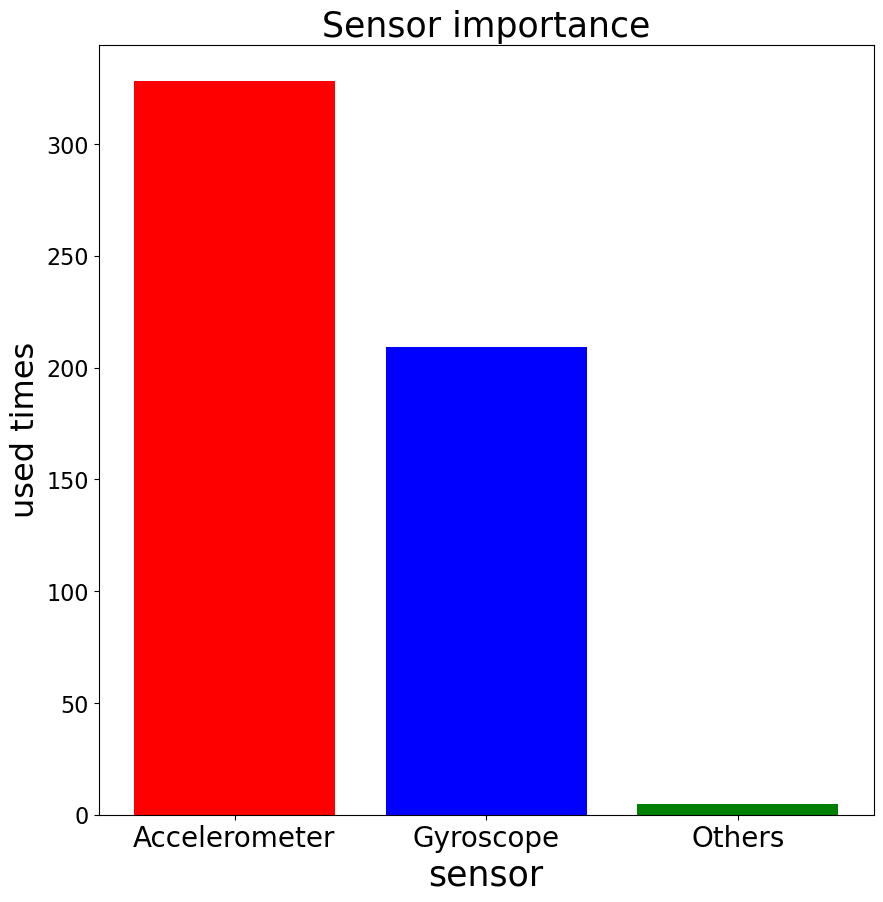

In [17]:
# Count for each type of Sensor
acc = 0
gyro = 0
others = 0
for column in data_train.columns:
    if 'Acc' in str(column):
        acc += 1
    elif 'Gyro' in str(column):
        gyro += 1
    else:
        others += 1

# Show bar plot for the three types
plt.rcParams.update({'figure.figsize': [10, 10], 'font.size': 16})
plt.title("Sensor importance", fontsize = 25)
plt.xlabel("sensor", size=25)
plt.ylabel("used times", size=23)
plt.xticks(fontsize=20)
plt.bar(['Accelerometer', 'Gyroscope', 'Others'], [acc, gyro, others], color = ('r', 'b', 'g'))

Exploring the Angle between Activities and Gravity

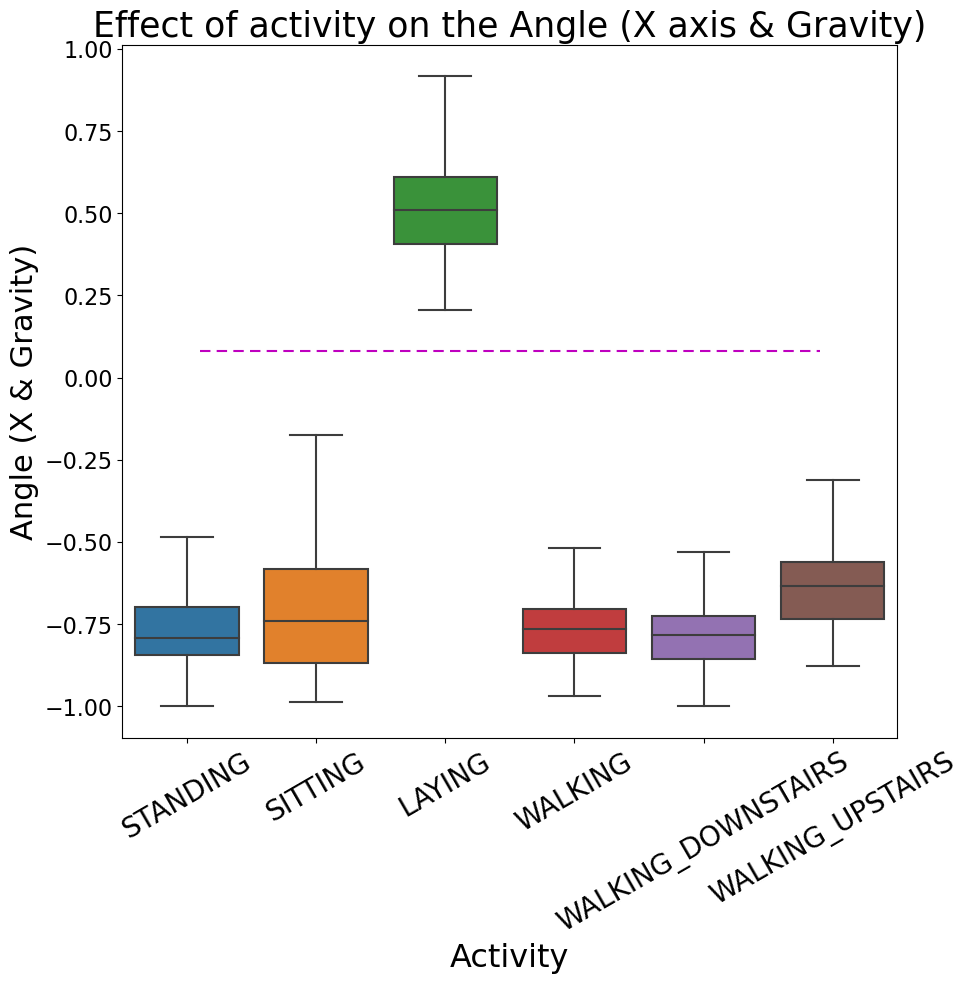

In [18]:
plt.figure(figsize=(10,9))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=data_train, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Effect of activity on the Angle (X axis & Gravity)', fontsize=25)
plt.xlabel("Activity", size=23)
plt.ylabel('Angle (X & Gravity)', size=22)
plt.xticks(rotation = 30, fontsize = 20)
plt.show()


Observation:If angle(X,gravityMean) > 0 then Activity is Laying

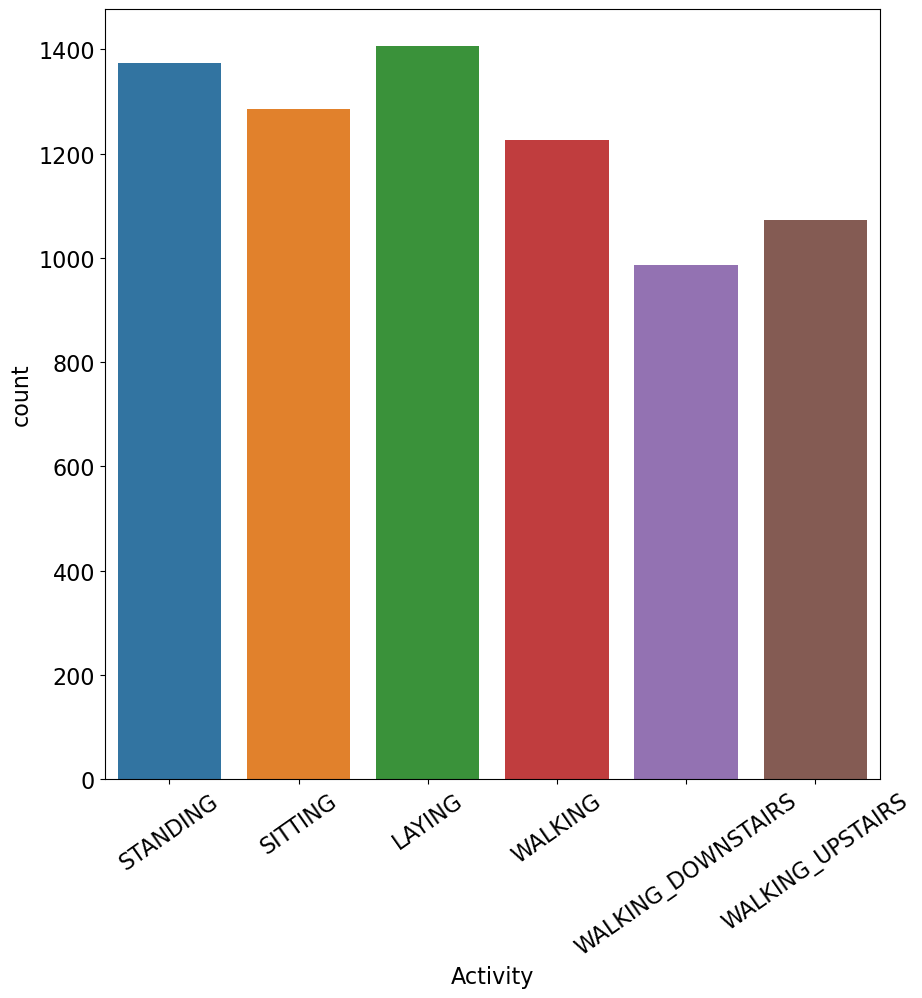

In [19]:
# Visiualize the categorical data ("Activity")
sns.countplot(x=data_train['Activity'])
plt.xticks(rotation=35)
plt.show()

Visualizing distribution of Stationary and Moving activites

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\ProgramDa

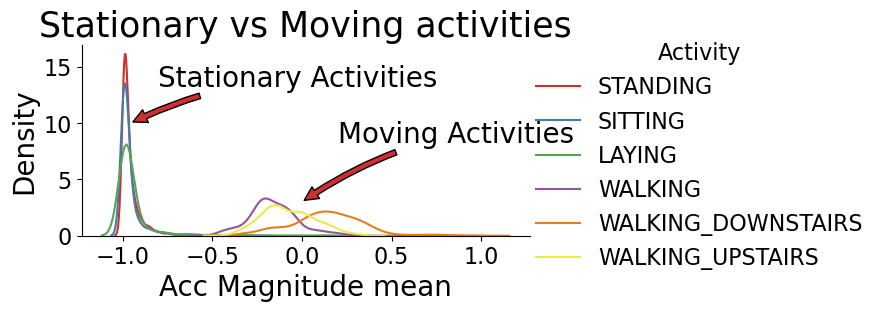

In [20]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(data_train, hue='Activity',aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,10), xytext=(-0.8, 14), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.title('Stationary vs Moving activities', fontsize=25)
plt.xlabel("Acc Magnitude mean", size=20)
plt.ylabel('Density', size=20)
plt.show()

Classifying Activities into static X Dynamic

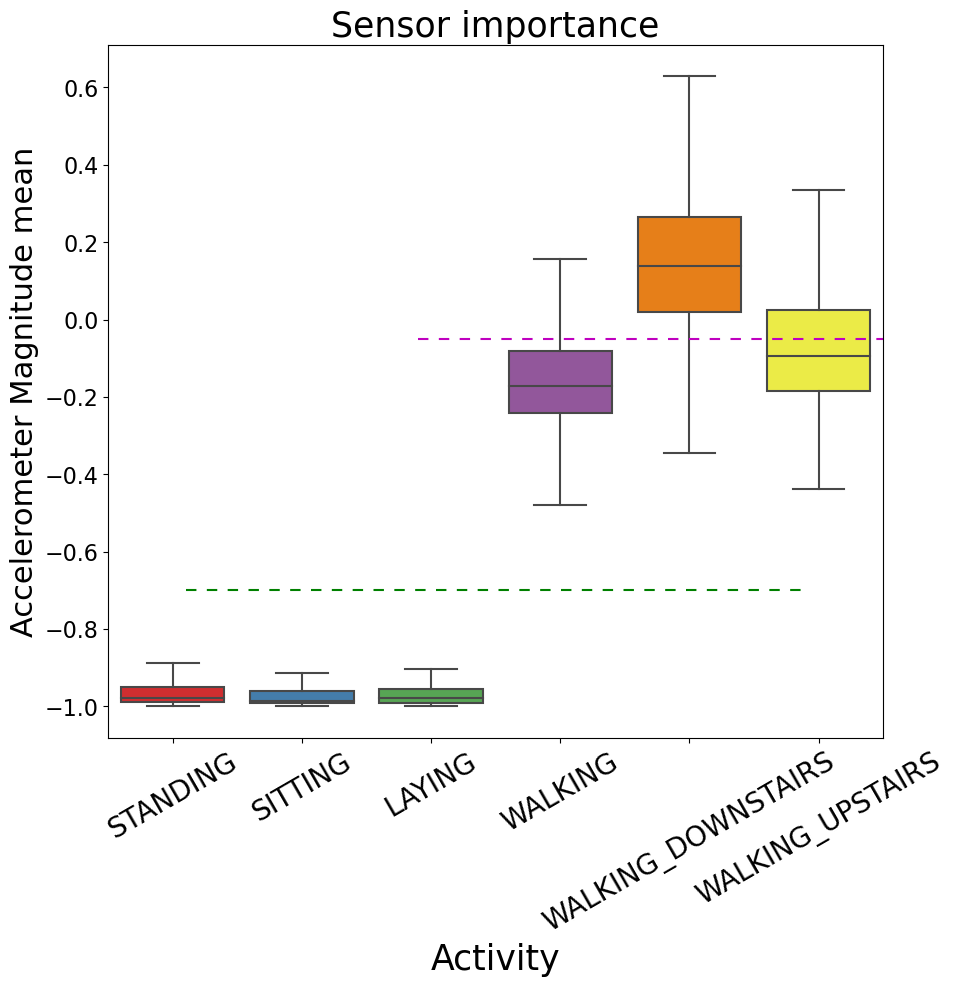

In [21]:
plt.figure(figsize=(10,9))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=data_train, showfliers=False, saturation=1)
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.title("Sensor importance", fontsize = 25)
plt.xlabel("Activity", size=25)
plt.ylabel('Accelerometer Magnitude mean', size=22)
plt.xticks(rotation=30, fontsize=20)
plt.show()

Observations:
*   If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
*   If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
*   If tAccMean > 0.0 then the Activity is WalkingDownstairs.
*   As we saw the activities were splitted into 2 groups as we wanted



In [22]:
np.unique(data_train["Activity"])

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [23]:
columns = data_train.columns
print(columns.shape)
columns

(542,)


Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=542)

In [24]:
min_X = []
min_Y = []
min_Z = []

mean_X = []
mean_Y = []
mean_Z = []

max_X = []
max_Y = []
max_Z = []

for i in columns:
    if "min" in i:
        if "X" in i:
            min_X.append(i)
            mean_X.append(i.replace("min", "mean"))
            max_X.append(i.replace("min", "max"))
        elif "Y" in i:
            min_Y.append(i)
            mean_Y.append(i.replace("min", "mean"))
            max_Y.append(i.replace("min", "mean"))
        elif "Z" in i:
            min_Z.append(i)
            mean_Z.append(i.replace("min", "mean"))
            max_Z.append(i.replace("min", "mean"))

        
print(min_X)
print(min_Y)
print(min_Z, "\n")

print(mean_X)
print(mean_Y)
print(mean_Z, "\n")

print(max_X)
print(max_Y)
print(max_Z, "\n")

['tBodyAcc-min()-X', 'tGravityAcc-min()-X', 'tBodyAccJerk-min()-X', 'tBodyGyro-min()-X', 'tBodyGyroJerk-min()-X', 'fBodyAcc-min()-X', 'fBodyAccJerk-min()-X', 'fBodyGyro-min()-X']
['tBodyAcc-min()-Y', 'tGravityAcc-min()-Y', 'tBodyAccJerk-min()-Y', 'tBodyGyro-min()-Y', 'tBodyGyroJerk-min()-Y', 'fBodyAcc-min()-Y', 'fBodyAccJerk-min()-Y', 'fBodyGyro-min()-Y']
['tBodyAcc-min()-Z', 'tGravityAcc-min()-Z', 'tBodyAccJerk-min()-Z', 'tBodyGyro-min()-Z', 'tBodyGyroJerk-min()-Z', 'fBodyAcc-min()-Z', 'fBodyAccJerk-min()-Z', 'fBodyGyro-min()-Z'] 

['tBodyAcc-mean()-X', 'tGravityAcc-mean()-X', 'tBodyAccJerk-mean()-X', 'tBodyGyro-mean()-X', 'tBodyGyroJerk-mean()-X', 'fBodyAcc-mean()-X', 'fBodyAccJerk-mean()-X', 'fBodyGyro-mean()-X']
['tBodyAcc-mean()-Y', 'tGravityAcc-mean()-Y', 'tBodyAccJerk-mean()-Y', 'tBodyGyro-mean()-Y', 'tBodyGyroJerk-mean()-Y', 'fBodyAcc-mean()-Y', 'fBodyAccJerk-mean()-Y', 'fBodyGyro-mean()-Y']
['tBodyAcc-mean()-Z', 'tGravityAcc-mean()-Z', 'tBodyAccJerk-mean()-Z', 'tBodyGyro-mean(

In [25]:
# Mean of X- Coordinates & Y- Coordinates wrt Acclerometer & Gyroscope

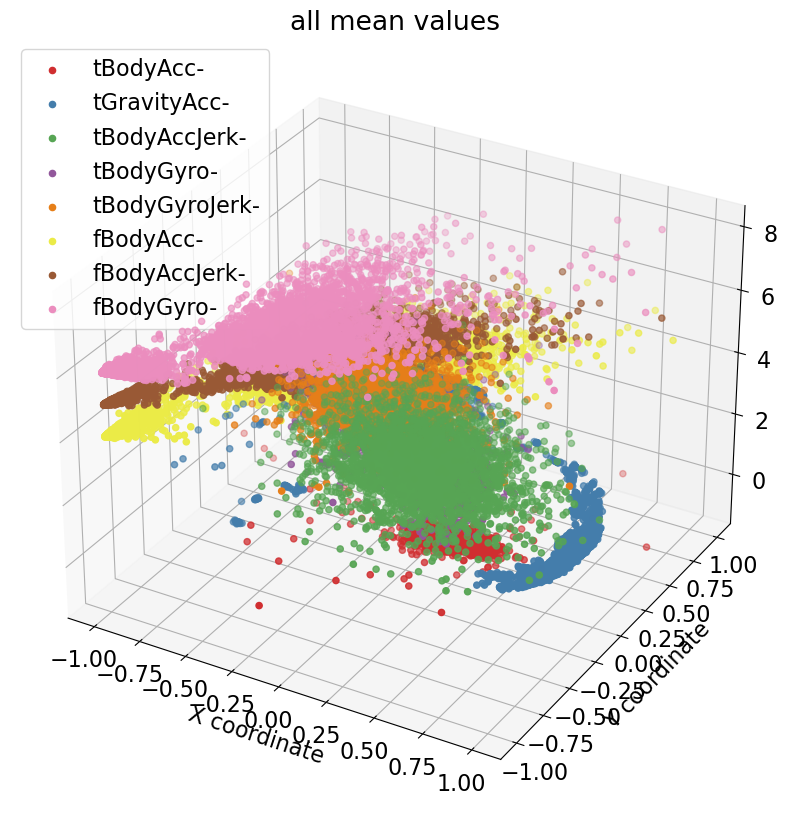

In [26]:
fig = plt.figure(figsize=(10, 10))
axs = plt.axes(projection="3d")

for i in range(len(mean_X)):
    axs.scatter(data_train[mean_X[i]].values, data_train[mean_Y[i]].values, data_train[mean_Z[i]].values+i, label=mean_X[i][0:-8])

plt.title("all mean values")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.legend(loc="upper left")
plt.show()

In [27]:
# Box Plot of Angle(Gravity Mean)  wrt  X,Y,Z Coordinates 

[Text(0, 0, 'LAYING'),
 Text(1, 0, 'SITTING'),
 Text(2, 0, 'STANDING'),
 Text(3, 0, 'WALKING'),
 Text(4, 0, 'WALKING_DOWNSTAIRS'),
 Text(5, 0, 'WALKING_UPSTAIRS')]

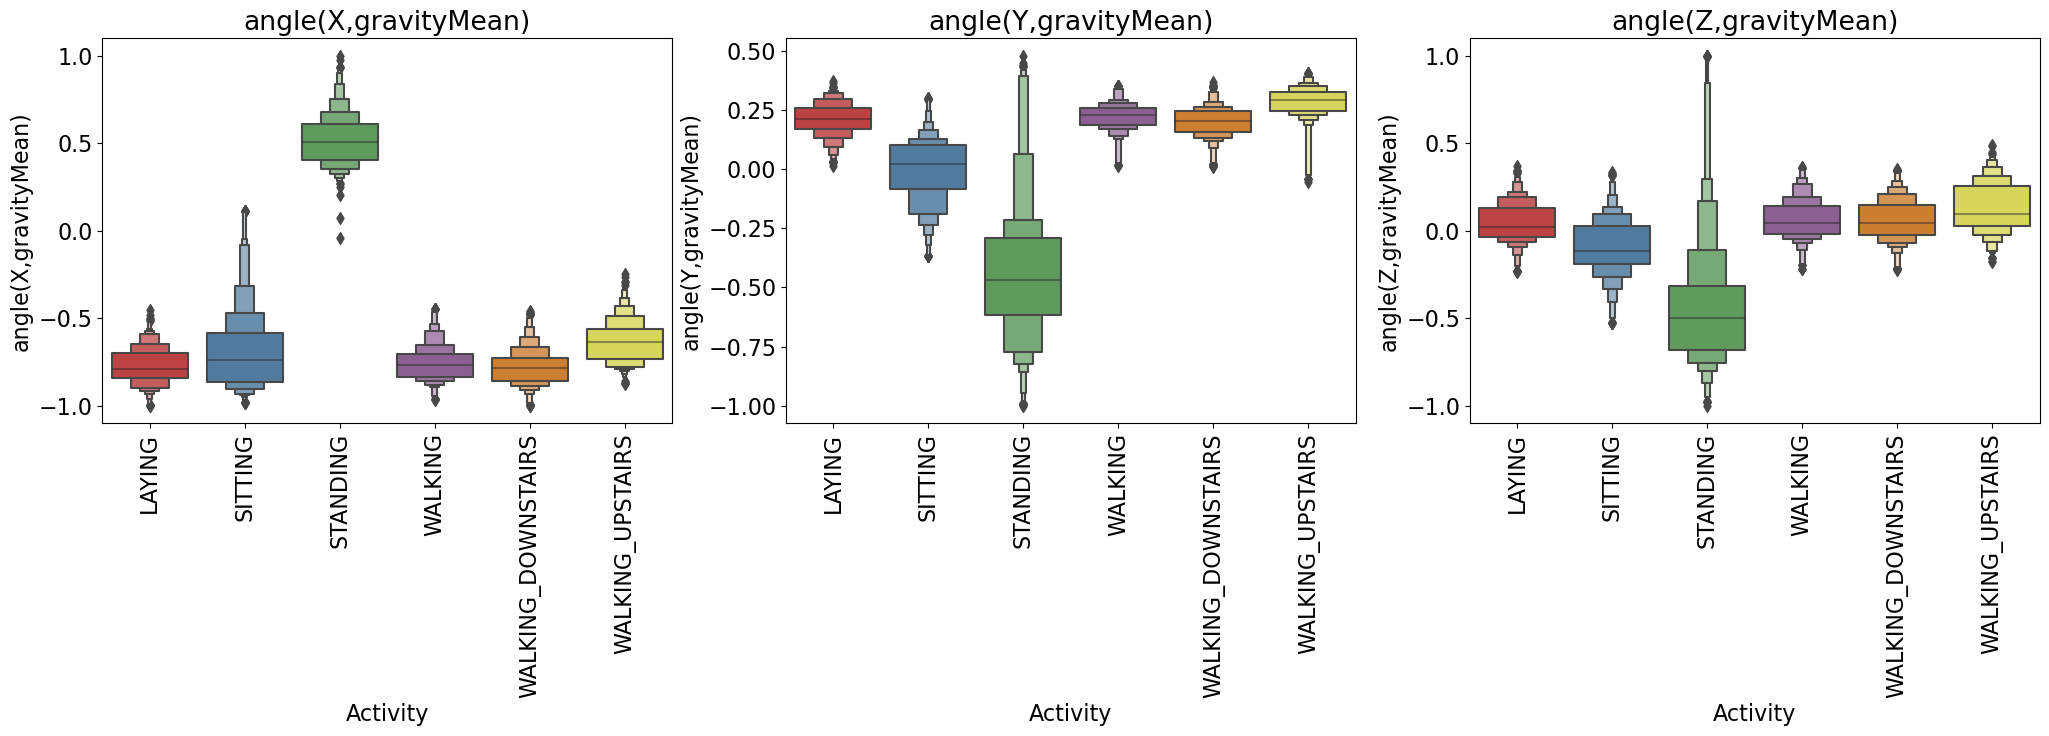

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(25, 5))
sns.boxenplot(ax = axs[0], x="Activity", y="angle(X,gravityMean)", data=data_train)
sns.boxenplot(ax = axs[1], x="Activity", y="angle(Y,gravityMean)", data=data_train)
sns.boxenplot(ax = axs[2], x="Activity", y="angle(Z,gravityMean)", data=data_train)

axs[0].set_title("angle(X,gravityMean)")
axs[0].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], rotation="vertical")

axs[1].set_title("angle(Y,gravityMean)")
axs[1].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], rotation="vertical")

axs[2].set_title("angle(Z,gravityMean)")
axs[2].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], rotation="vertical")

In [29]:
# Difference of features of X coordinates in Accelerometer and Gyroscorpe

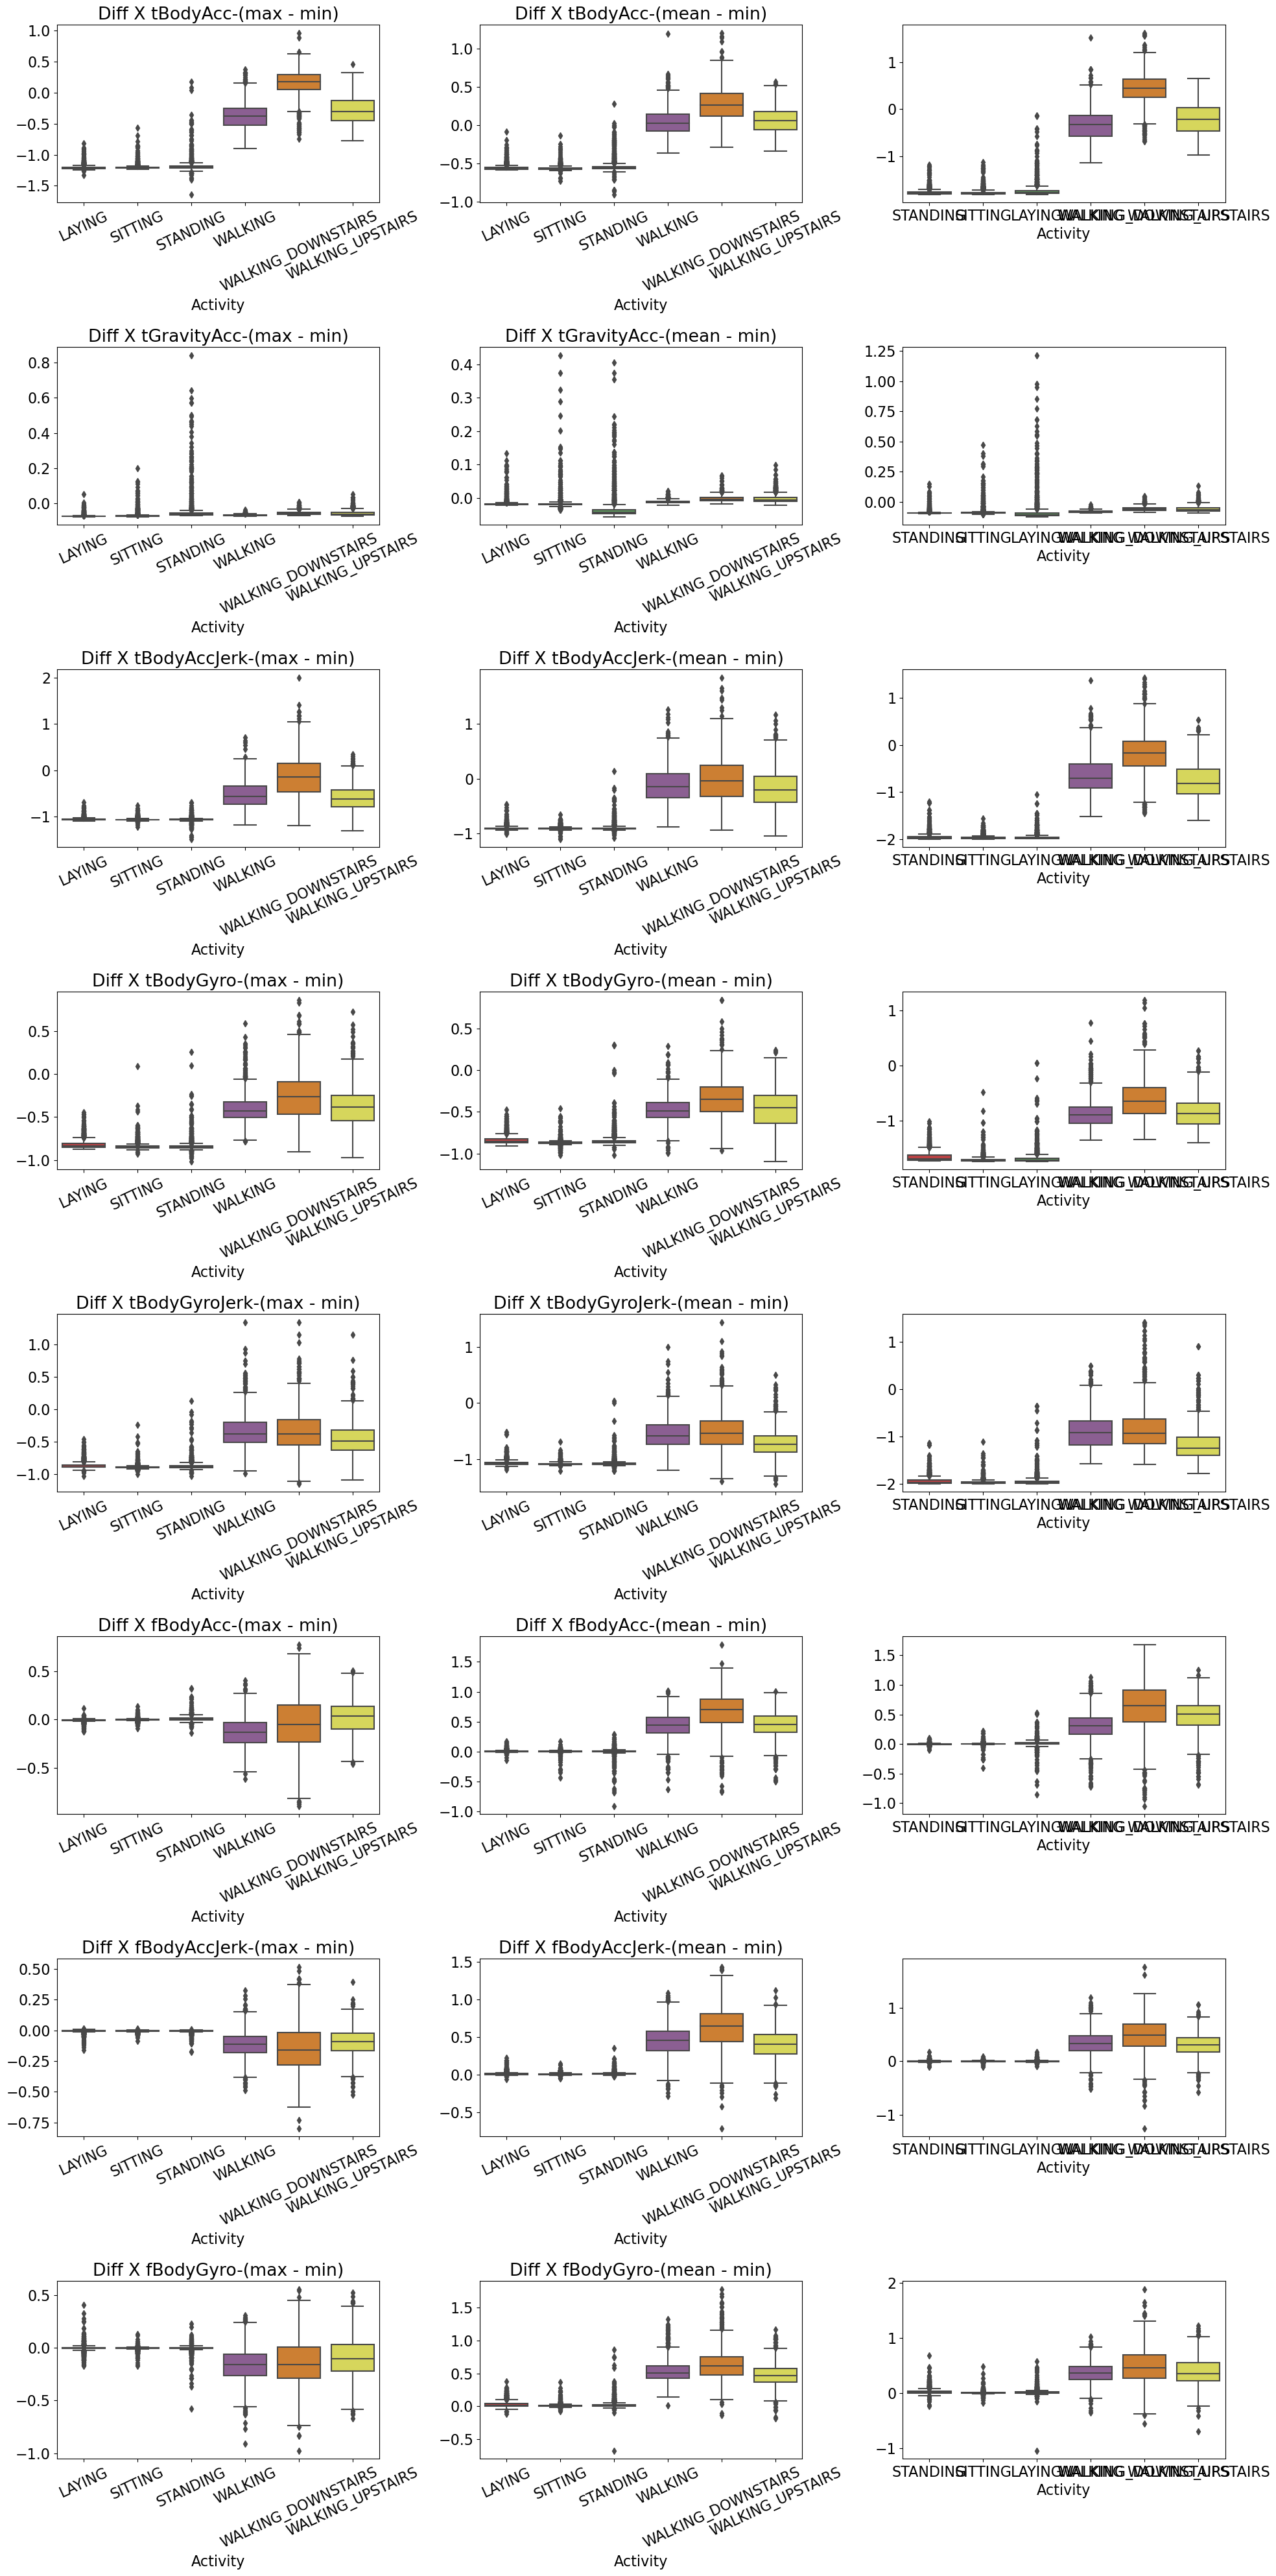

In [30]:
fig, axs = plt.subplots(len(min_X), 3, figsize=(20, 40))

for i in range(len(min_X)):
    mean_min_X = data_train[mean_X[i]] - data_train[min_X[i]]
    max_mean_X = data_train[max_X[i]] - data_train[mean_X[i]]
    max_min_X = data_train[max_X[i]] - data_train[min_X[i]]
    
#     mean_min_Y = data_train[mean_Y[i]] - data_train[min_Y[i]]
#     max_mean_Y = data_train[max_Y[i]] - data_train[mean_Y[i]]
#     max_min_Y = data_train[max_Y[i]] - data_train[min_Y[i]]
    
#     mean_min_Z = data_train[mean_Z[i]] - data_train[min_Z[i]]
#     max_mean_Z = data_train[max_Z[i]]  -  data_train[mean_Z[i]]
#     max_min_Z =  data_train[max_Z[i]]  -  data_train[min_Z[i]]
    
    sns.boxplot(ax=axs[i, 0], x=data_train["Activity"], y=max_mean_X)
    sns.boxplot(ax=axs[i, 1], x=data_train["Activity"], y=mean_min_X)
    sns.boxplot(ax=axs[i, 2], x=data_train["Activity"], y=max_min_X)
    
    axs[i, 0].set_title("Diff X "+mean_X[i][0:-8]+"(max - mean)")
    axs[i, 0].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
           'WALKING_UPSTAIRS'], rotation=25)

    axs[i, 1].set_title("Diff X "+mean_X[i][0:-8]+"(mean - min)")
    axs[i, 1].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
           'WALKING_UPSTAIRS'], rotation=25)
    
    axs[i, 0].set_title("Diff X "+mean_X[i][0:-8]+"(max - min)")
    axs[i, 0].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
           'WALKING_UPSTAIRS'], rotation=25)
    
plt.tight_layout()

In [31]:
# Difference of features of Y coordinates in Accelerometer and Gyroscorpe

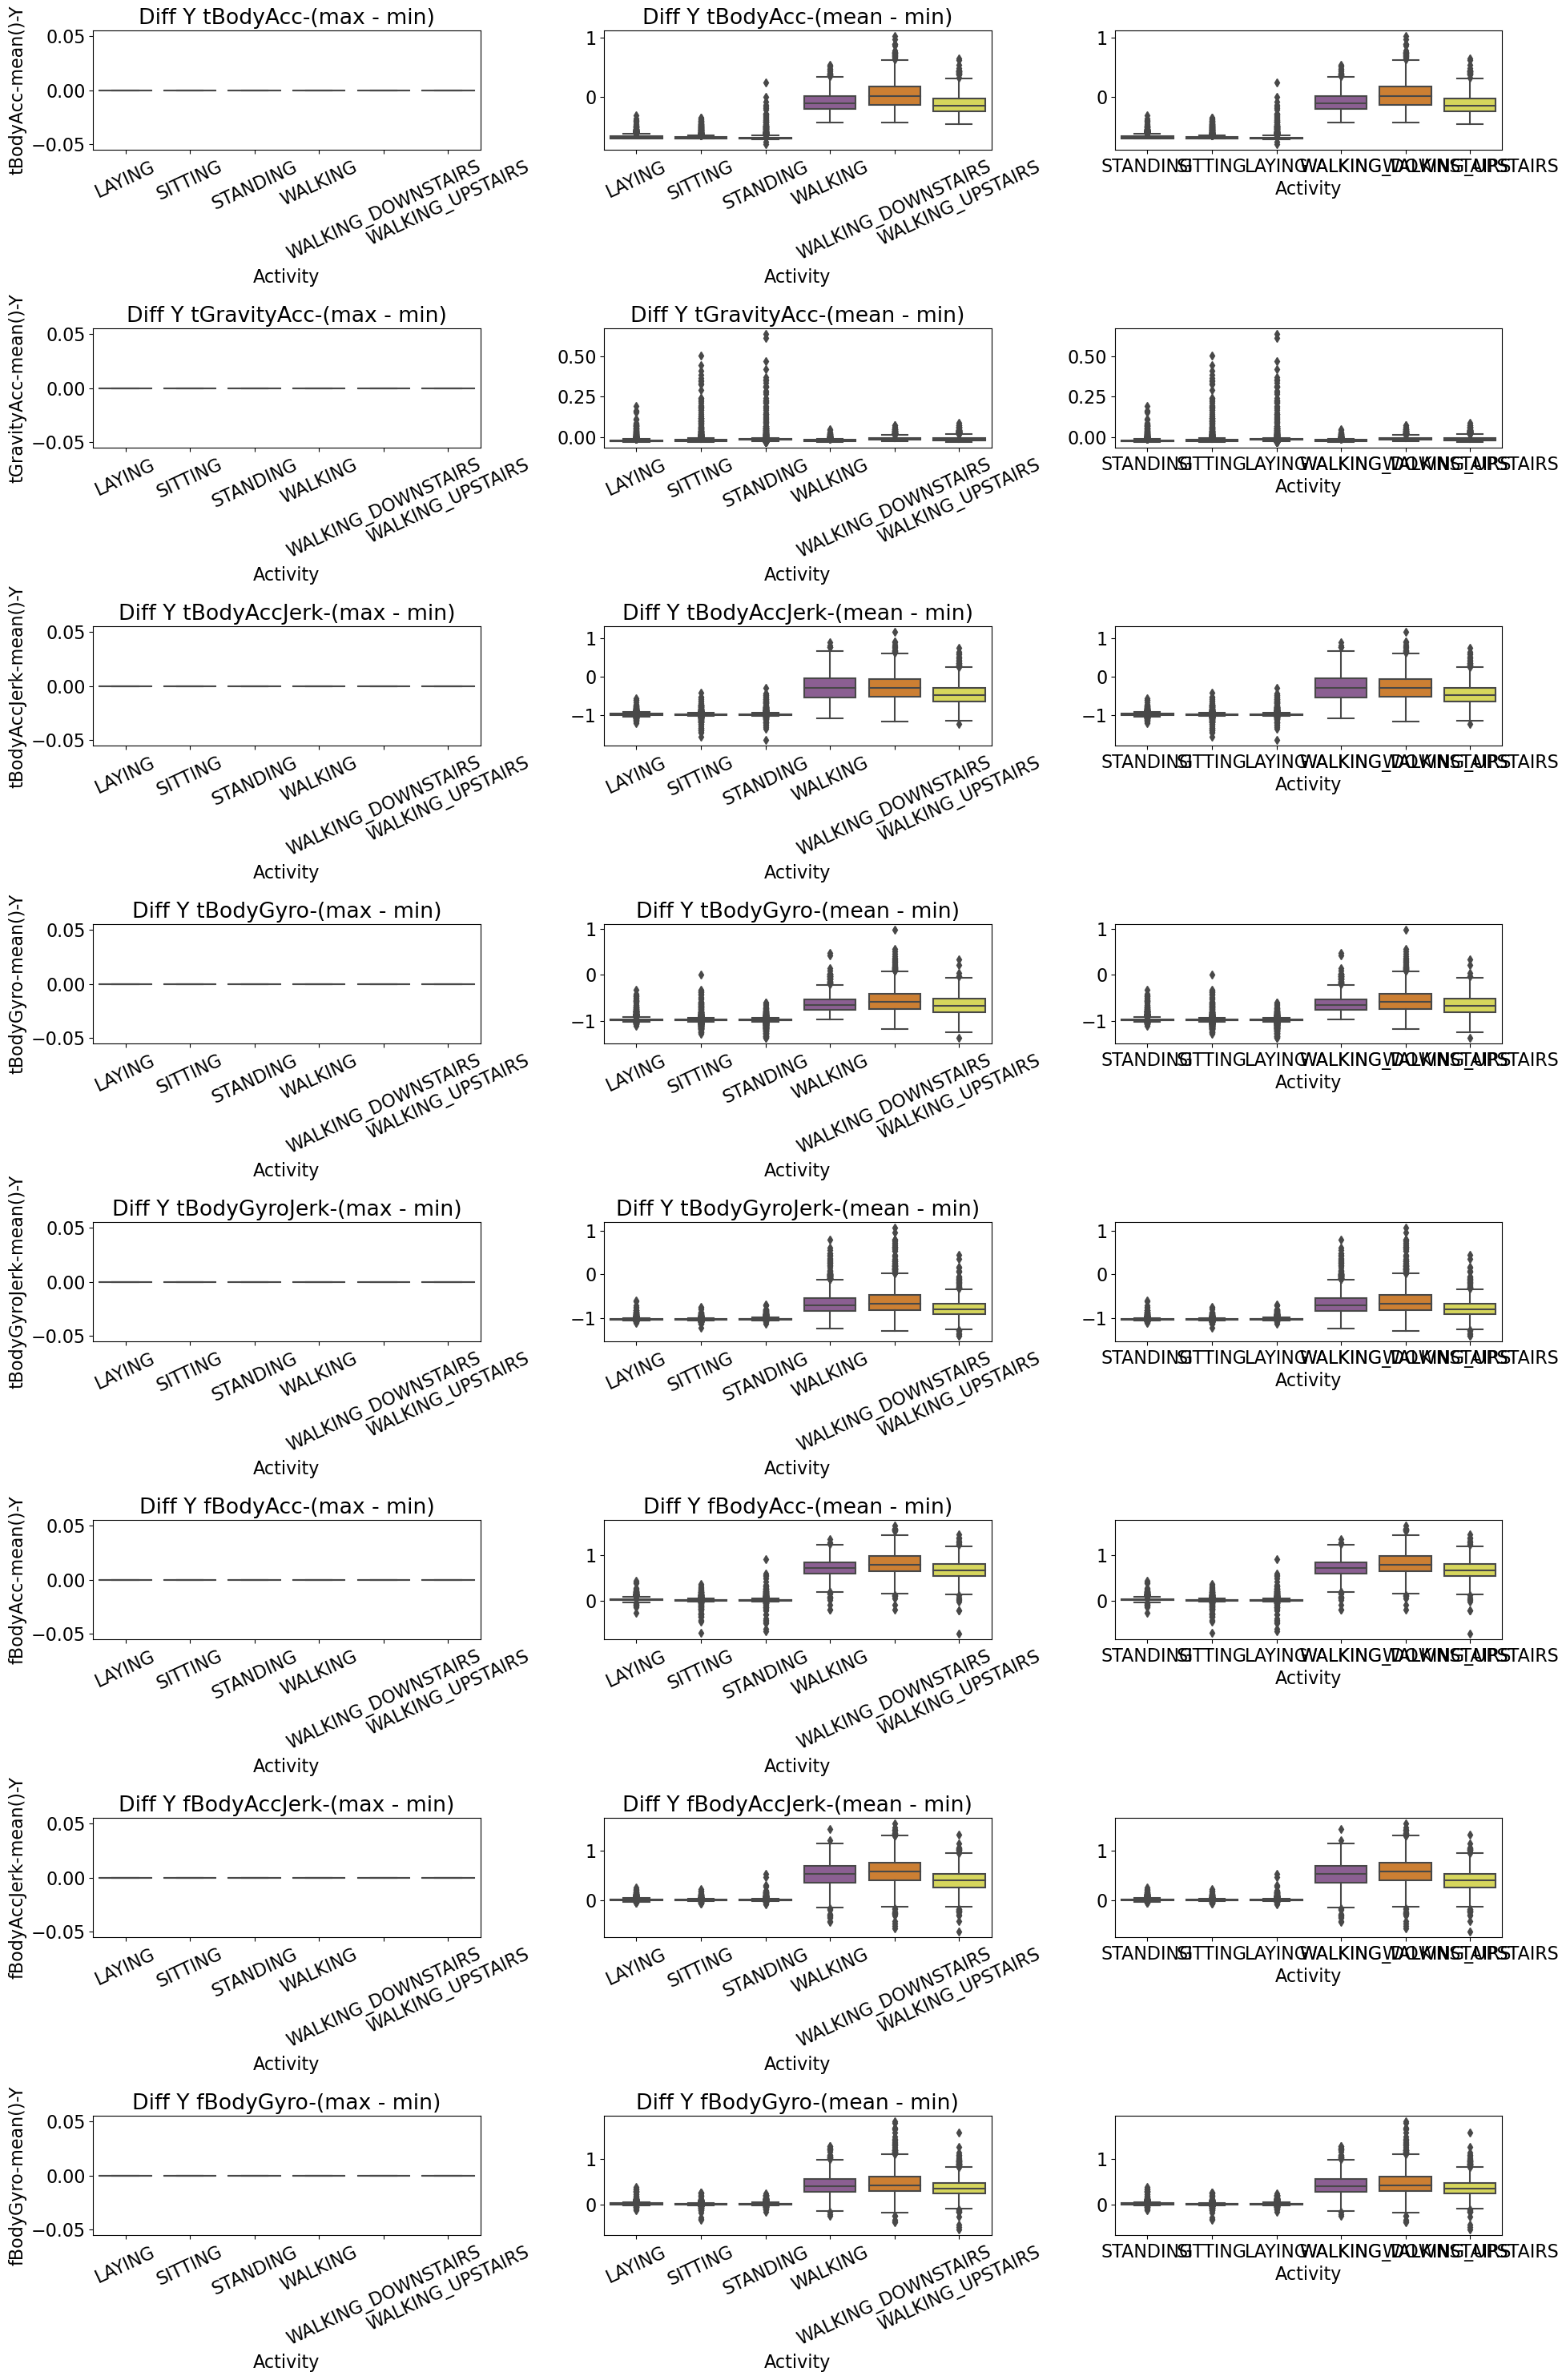

In [32]:
fig, axs = plt.subplots(len(min_X), 3, figsize=(20, 30))

for i in range(len(min_X)):
    
    mean_min_Y = data_train[mean_Y[i]] - data_train[min_Y[i]]
    max_mean_Y = data_train[max_Y[i]] - data_train[mean_Y[i]]
    max_min_Y = data_train[max_Y[i]] - data_train[min_Y[i]]
    
    sns.boxplot(ax=axs[i, 0], x=data_train["Activity"], y=max_mean_Y)
    sns.boxplot(ax=axs[i, 1], x=data_train["Activity"], y=mean_min_Y)
    sns.boxplot(ax=axs[i, 2], x=data_train["Activity"], y=max_min_Y)
    
    axs[i, 0].set_title("Diff Y "+mean_X[i][0:-8]+"(max - mean)")
    axs[i, 0].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
           'WALKING_UPSTAIRS'], rotation=25)

    axs[i, 1].set_title("Diff Y "+mean_X[i][0:-8]+"(mean - min)")
    axs[i, 1].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
           'WALKING_UPSTAIRS'], rotation=25)
    
    axs[i, 0].set_title("Diff Y "+mean_X[i][0:-8]+"(max - min)")
    axs[i, 0].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
           'WALKING_UPSTAIRS'], rotation=25)
    
plt.tight_layout()

In [33]:
# Difference of features of Z coordinates in Accelerometer and Gyroscorpe

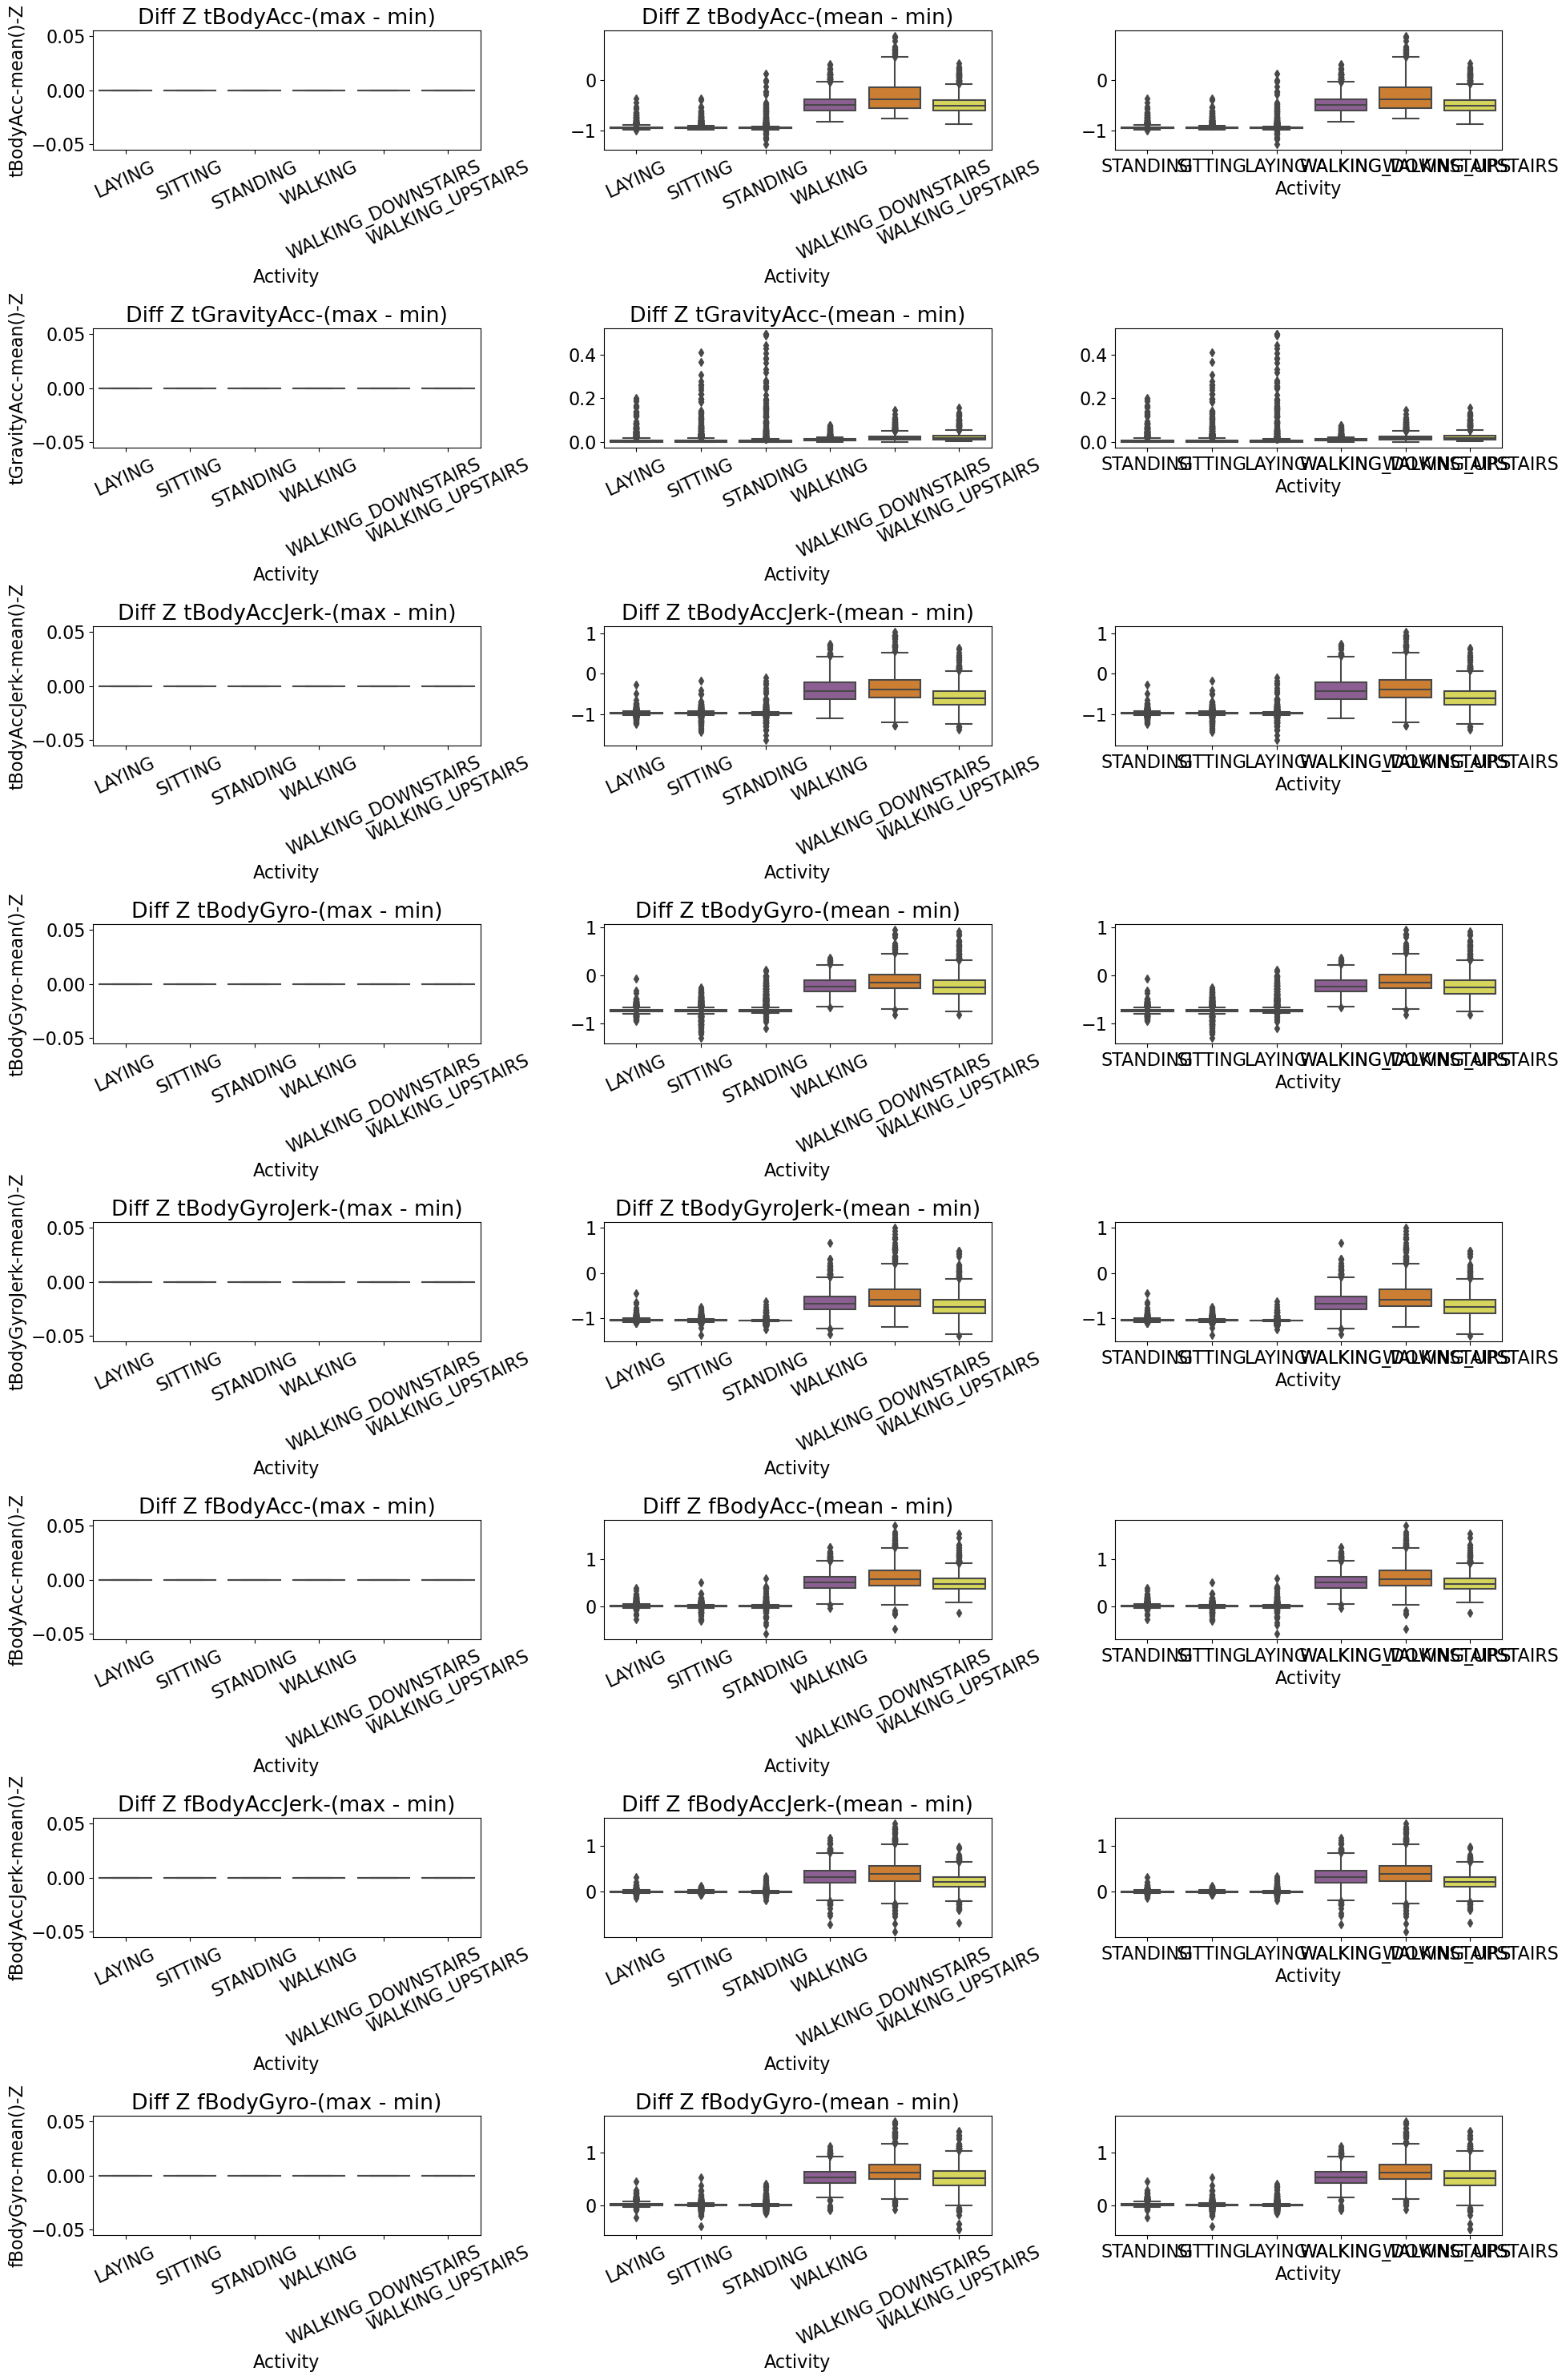

In [34]:
fig, axs = plt.subplots(len(min_X), 3, figsize=(20, 30))

for i in range(len(min_X)):
    
    mean_min_Z = data_train[mean_Z[i]] - data_train[min_Z[i]]
    max_mean_Z = data_train[max_Z[i]] - data_train[mean_Z[i]]
    max_min_Z = data_train[max_Z[i]] - data_train[min_Z[i]]
    
    sns.boxplot(ax=axs[i, 0], x=data_train["Activity"], y=max_mean_Z)
    sns.boxplot(ax=axs[i, 1], x=data_train["Activity"], y=mean_min_Z)
    sns.boxplot(ax=axs[i, 2], x=data_train["Activity"], y=max_min_Z)
    
    axs[i, 0].set_title("Diff Z "+mean_X[i][0:-8]+"(max - mean)")
    axs[i, 0].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
           'WALKING_UPSTAIRS'], rotation=25)

    axs[i, 1].set_title("Diff Z "+mean_X[i][0:-8]+"(mean - min)")
    axs[i, 1].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
           'WALKING_UPSTAIRS'], rotation=25)
    
    axs[i, 0].set_title("Diff Z "+mean_X[i][0:-8]+"(max - min)")
    axs[i, 0].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
           'WALKING_UPSTAIRS'], rotation=25)
    
plt.tight_layout()

In [35]:
# Minimum Values of X- Coordinates & Y- Coordinates wrt Acclerometer & Gyroscope

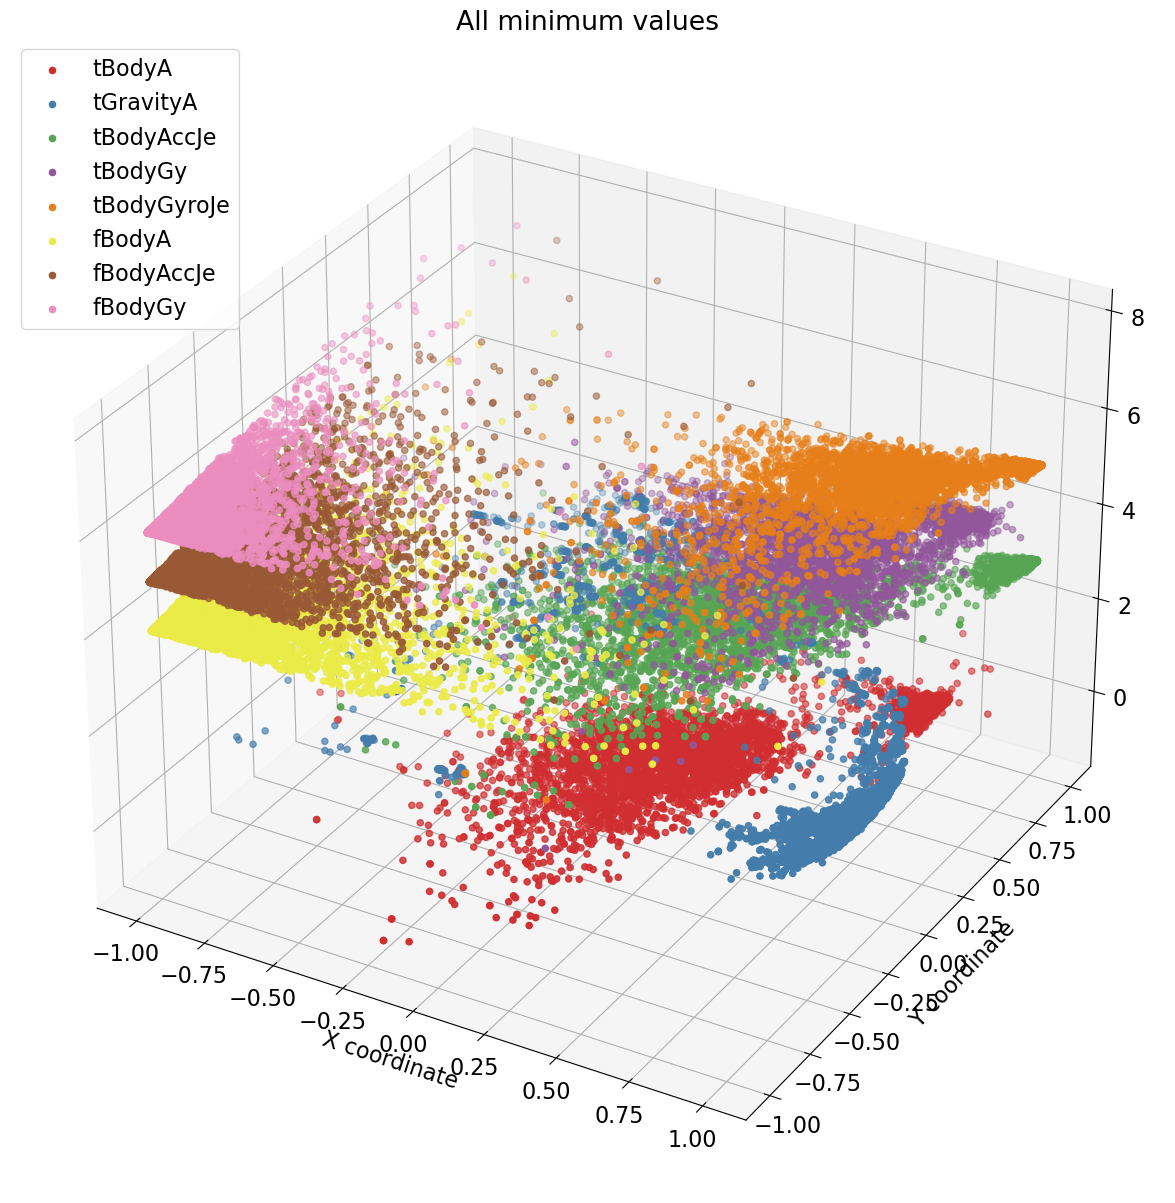

In [36]:
fig = plt.figure(figsize=(15, 15))
axs = plt.axes(projection="3d")

for i in range(len(min_X)):
    axs.scatter(data_train[min_X[i]].values, data_train[min_Y[i]].values, data_train[min_Y[i]].values+i, label=min_X[i][0:-10])

plt.title("All minimum values")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.legend(loc="upper left")
plt.show()

In [37]:
# Miximum Values of X- Coordinates & Y- Coordinates wrt Acclerometer & Gyroscope

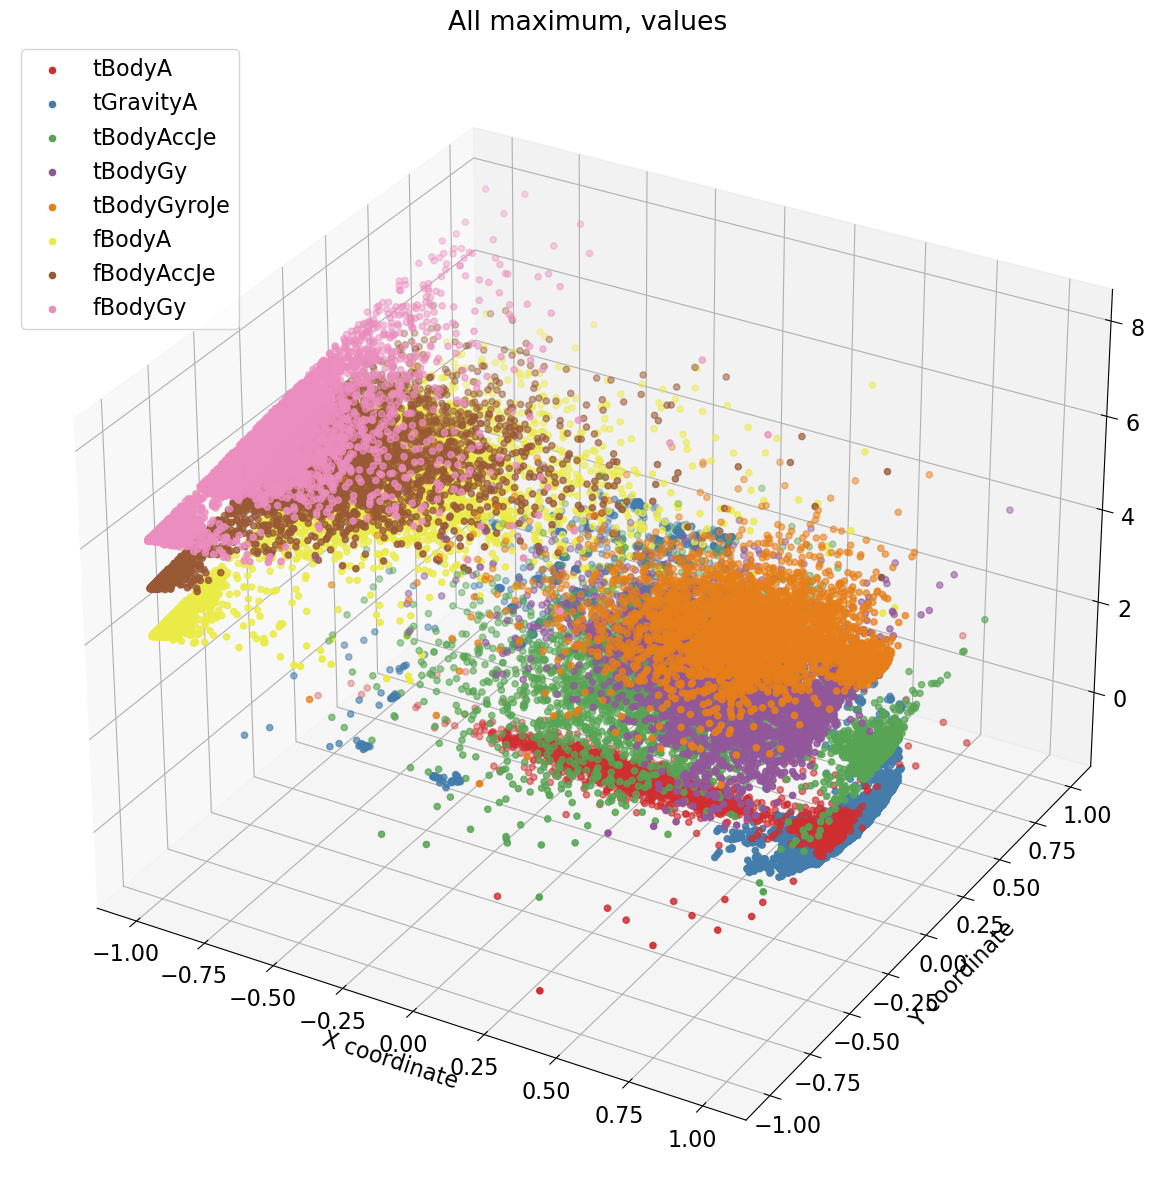

In [38]:
fig = plt.figure(figsize=(15, 15))
axs = plt.axes(projection="3d")

for i in range(len(max_X)):
    axs.scatter(data_train[min_X[i]].values, data_train[max_Y[i]].values, data_train[max_Y[i]].values+i, label=max_X[i][0:-10])

plt.title("All maximum, values")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.legend(loc="upper left")
plt.show()

In [39]:
# Gravity Mean wrt X,Y,Z Coordinates

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


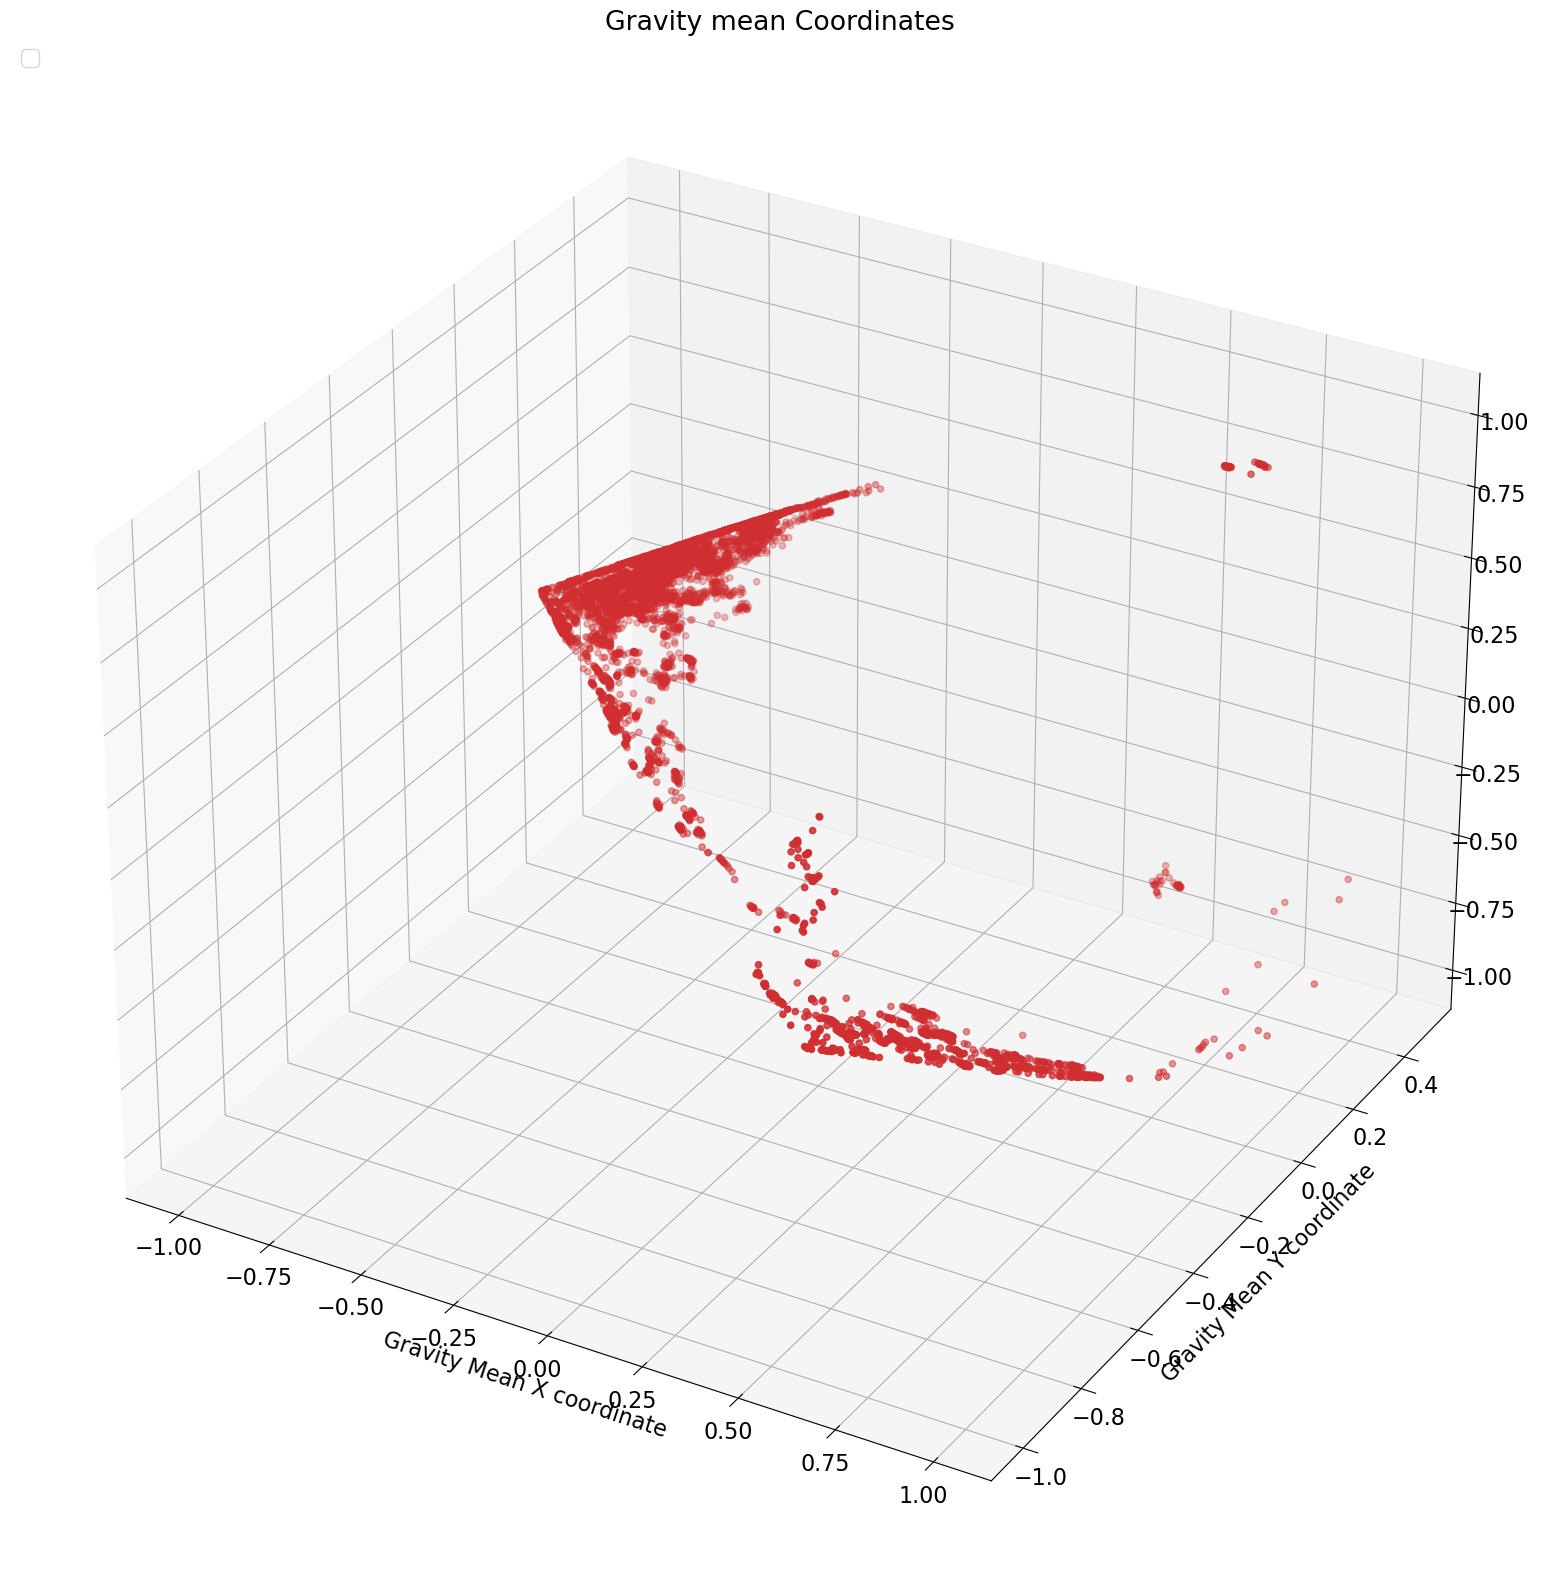

In [40]:
fig = plt.figure(figsize=(20, 20))
axs = plt.axes(projection="3d")

angle_X_gravityMean = data_train["angle(X,gravityMean)"].values
angle_Y_gravityMean = data_train["angle(Y,gravityMean)"].values
angle_Z_gravityMean = data_train["angle(Z,gravityMean)"].values

axs.scatter(angle_X_gravityMean, angle_Y_gravityMean, angle_Z_gravityMean)

plt.title("Gravity mean Coordinates")
plt.xlabel("Gravity Mean X coordinate")
plt.ylabel("Gravity Mean Y coordinate")
# plt.set_zlabel("Gravity Mean Z coordinate")
plt.legend(loc="upper left")
plt.show()

In [41]:
X = data_train.drop('Activity',axis=1)
y= data_train['Activity']

In [42]:
# Label Encoding
le = LabelEncoder()
y = le.fit_transform(y)

In [43]:
y

array([2, 2, 2, ..., 5, 5, 5])

In [44]:
# Split the Dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [45]:
# Feature selection with SelectKBest
k = 100
selector = SelectKBest(f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


selected_indices=selector.get_support(indices=True)
selected_features = X_train.columns[selected_indices]
print(len(selected_features))

100


**Principle Component Analysis**

In [46]:
# Principal Component Analysis (PCA) for dimensionality reduction
pca = PCA(n_components=50)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_selected)
print(X_train_pca)

[[-4.90037839e+00  1.65833551e+00  6.53790724e-01 ... -1.28280045e-02
   1.13548815e-02 -8.64561298e-03]
 [ 3.50270024e+00  2.29298300e-01 -1.11311048e+00 ... -9.66514327e-02
  -4.34006791e-02 -1.83868524e-02]
 [ 5.05805261e+00 -7.98665560e-02  3.40303378e-01 ... -2.60122815e-03
   4.25767530e-02  7.49779223e-03]
 ...
 [ 2.16428912e+00 -6.27920873e-01 -1.33320565e+00 ...  4.23687438e-02
  -8.93732751e-02 -7.00749121e-02]
 [-4.26123216e+00 -1.25597266e+00  4.61900613e-01 ... -2.41764934e-02
  -1.94939994e-02 -7.31964572e-03]
 [ 4.02156182e+00 -3.54748652e-01 -8.13116476e-01 ... -7.13430972e-03
  -3.23556206e-02 -3.82292884e-02]]


**Data Modeling**

In [47]:
accuracy_scores = np.zeros(6)

**Logistic Regression**


In [48]:
# Logistic Regression
log  = LogisticRegression()
log.fit(X_train,y_train)

y_pred1 = log.predict(X_test)
accuracy_scores[0]=accuracy_score(y_test,y_pred1)*100
print("The Accuracy of Logistic Regression",accuracy_scores[0])

The Accuracy of Logistic Regression 97.96057104010877


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**K-Nearest Neighbors**

In [49]:

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


# Standardize features (mean = 0, variance = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust k to your preference

# Train the KNN classifier
knn.fit(X_train_scaled, y_train)

# Make predictions
predictions = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy_scores[1]= accuracy_score(y_test, predictions)*100
print(f'Accuracy: {accuracy_scores[1]=:.2f}')


Accuracy: accuracy_scores[1]=96.74


**Decision Tree**

In [50]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)  # You can adjust parameters as needed

# Train the Decision Tree classifier
decision_tree.fit(X_train, y_train)

# Make predictions
predictions = decision_tree.predict(X_test)

# Calculate accuracy
accuracy_scores[2]= accuracy_score(y_test, predictions)*100
print(f'Accuracy: {accuracy_scores[2]:.2f}')

Accuracy: 94.70


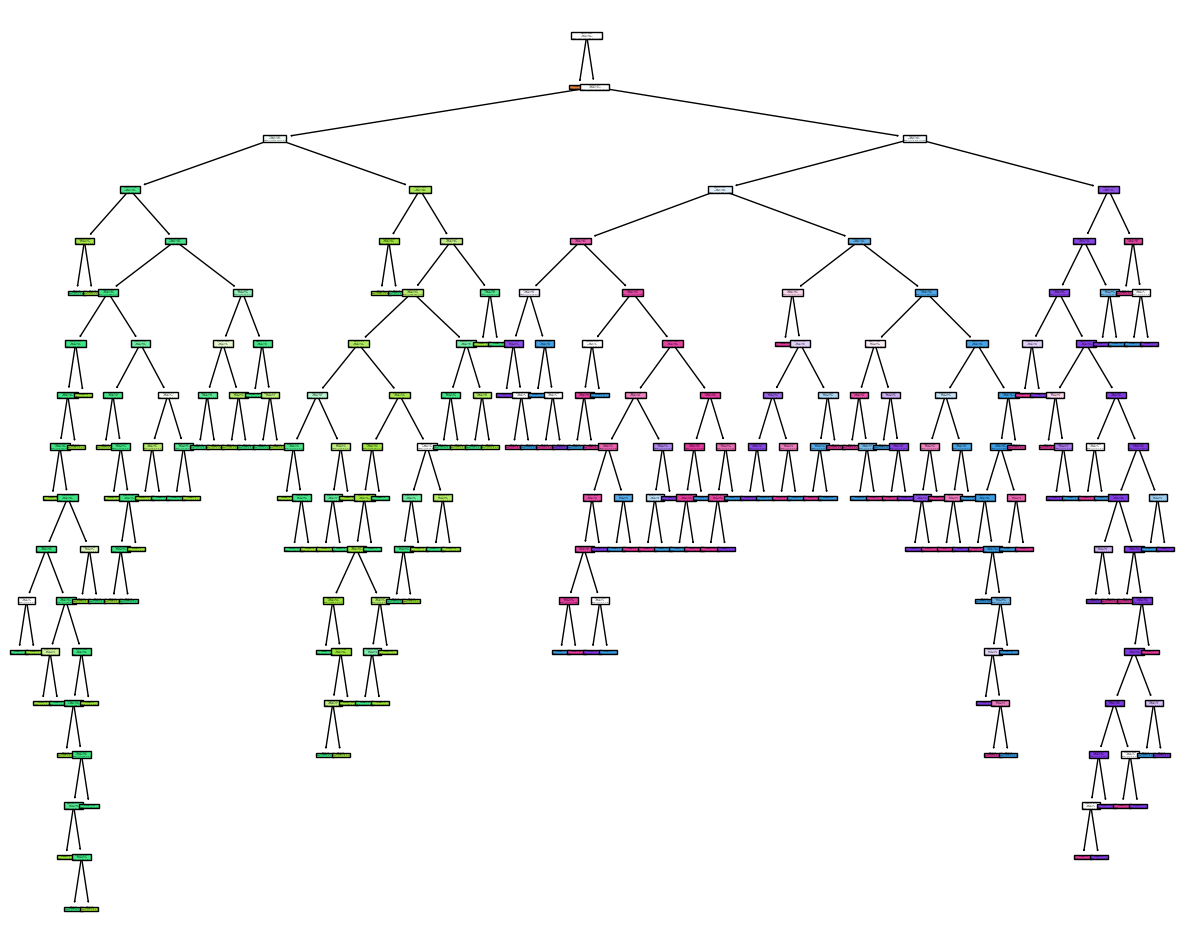

In [51]:
from sklearn import tree

fig = plt.figure(figsize=(15,12))
tree.plot_tree(decision_tree, filled=True)
plt.show()

**Random Forest Classifier**

In [52]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred2 = rf.predict(X_test)
accuracy_scores[3]=accuracy_score(y_test,y_pred2)*100

In [53]:
print("The Accuracy of Random Forest Classifier is: ",accuracy_scores[3])

The Accuracy of Random Forest Classifier is:  97.62066621346023


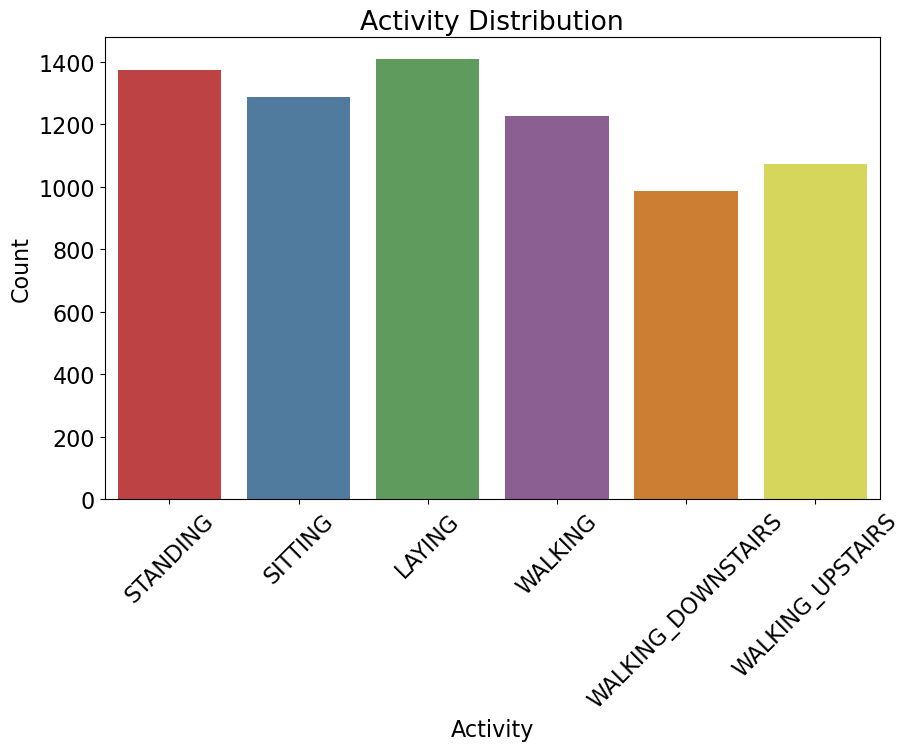

In [54]:
# Data visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='Activity', data=data_train)
plt.title('Activity Distribution')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Support Vector Machine**

Linear Kernel

In [55]:
# instantiate classifier with default hyperparameters
svc=SVC()

#Run SVM with linear kernel and C=1.0

# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0)
# fit classifier to training set
linear_svc.fit(X_train,y_train)
# make predictions on test set
y_pred_test=linear_svc.predict(X_test)
# compute and print accuracy score

#accuracy_scores[5]=accuracy_score(y_test, y_pred_test)*100
#print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}',accuracy_scores[5])

print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'.
format(accuracy_score(y_test, y_pred_test)))
#Run SVM with linear kernel and C=100.0

# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0)
# fit classifier to training set
linear_svc100.fit(X_train, y_train)
# make predictions on test set
y_pred=linear_svc100.predict(X_test)
# compute and print accuracy score
#accuracy_scores[6]=accuracy_score(y_test, y_pred_test)*100
#print('Model accuracy score with linear kernel and C=100.0 :{0:0.4f}',accuracy_scores[6])

print('Model accuracy score with linear kernel and C=100.0 :{0:0.4f}'. format(accuracy_score(y_test, y_pred)))

#Run SVM with linear kernel and C=1000.0

# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0)
# fit classifier to training set
linear_svc1000.fit(X_train, y_train)
# make predictions on test set
y_pred=linear_svc1000.predict(X_test)
# compute and print accuracy score
#accuracy_scores[7]=accuracy_score(y_test, y_pred)*100
#print('Model accuracy score with linear kernel and C=1000.0 :{0:0.4f}',accuracy_scores[7])

print('Model accuracy score with linear kernel and C=1000.0 :{0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1.0 : 0.9857
Model accuracy score with linear kernel and C=100.0 :0.9755
Model accuracy score with linear kernel and C=1000.0 :0.9755


In [56]:
#Compare the train-set and test-set accuracy

y_pred_train = linear_svc.predict(X_train)
y_pred_train

array([0, 5, 5, ..., 3, 1, 3])

In [57]:
accuracy_scores[4]=accuracy_score(y_train, y_pred_train)
print('Training-set accuracy score: {0:0.4f}',accuracy_scores[4])

Training-set accuracy score: {0:0.4f} 0.9938785920761776


In [58]:
#Check for overfitting and underfitting

#print the scores on training and test set
print('Training set score: {:.4f}'.format(linear_svc.score(X_train,y_train)))
print('Test set score: {:.4f}'.format(linear_svc.score(X_test,y_test)))

Training set score: 0.9939
Test set score: 0.9857


In [59]:
# Print the Confusion Matrix and slice it into four pieces
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[280   0   0   0   0   0]
 [  0 253   9   0   0   0]
 [  0   9 267   0   0   0]
 [  0   0   0 246   0   1]
 [  0   0   0   0 206   0]
 [  0   0   0   0   2 198]]


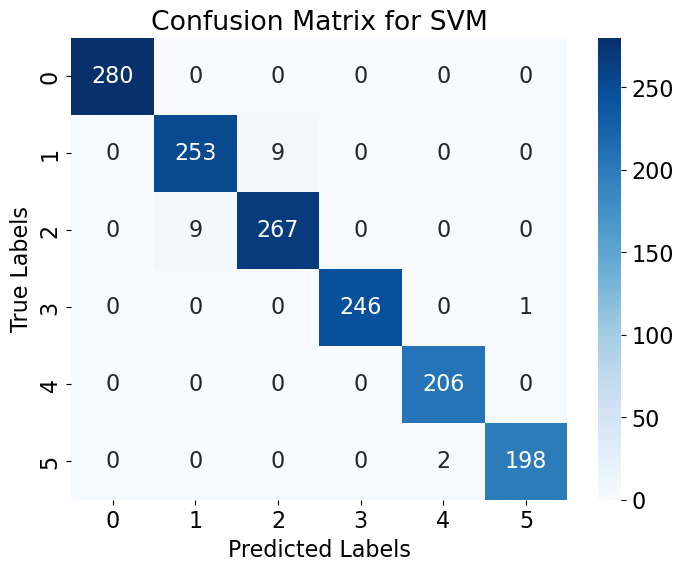

In [60]:
# You can visualize the confusion matrix if needed
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [61]:
#Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.97      0.97      0.97       262
           2       0.97      0.97      0.97       276
           3       1.00      1.00      1.00       247
           4       0.99      1.00      1.00       206
           5       0.99      0.99      0.99       200

    accuracy                           0.99      1471
   macro avg       0.99      0.99      0.99      1471
weighted avg       0.99      0.99      0.99      1471



In [62]:
# Hyperparameter Optimization using GridSearch CV
# import GridSearchCV

from sklearn.model_selection import GridSearchCV
# import SVC classifier
from sklearn.svm import SVC

# instantiate classifier with default hyperparameters with kernel=rbf,C=1.0 and gamma=auto
svc=SVC()
# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
{'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
{'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree':[2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
]
grid_search = GridSearchCV(estimator = svc,param_grid = parameters,scoring = 'accuracy',cv = 5,verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [63]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n',(grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n',(grid_search.best_estimator_))

GridSearch CV best score : 0.9874


Parameters that give the best results : 

 {'C': 1, 'degree': 2, 'gamma': 0.04, 'kernel': 'poly'}


Estimator that was chosen by the search : 

 SVC(C=1, degree=2, gamma=0.04, kernel='poly')


In [64]:
print('GridSearch CV score on test set:{0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set:0.9871


In [65]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [66]:
# Gradient Boosting

import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds (trees)
    max_depth=3,       # Maximum depth of each tree
    learning_rate=0.1, # Step size shrinkage
    random_state=42    # For reproducibility
)

# Train the XGBoost classifier
xgb_classifier.fit(X_train, y_train)

#Make Prediction
y_pred = xgb_classifier.predict(X_test)

# Evalute the model
accuracy_scores[5] = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy_scores[5])

Accuracy: 99.04826648538409


**Visualize the different DataModel Output using a Bar Graph**

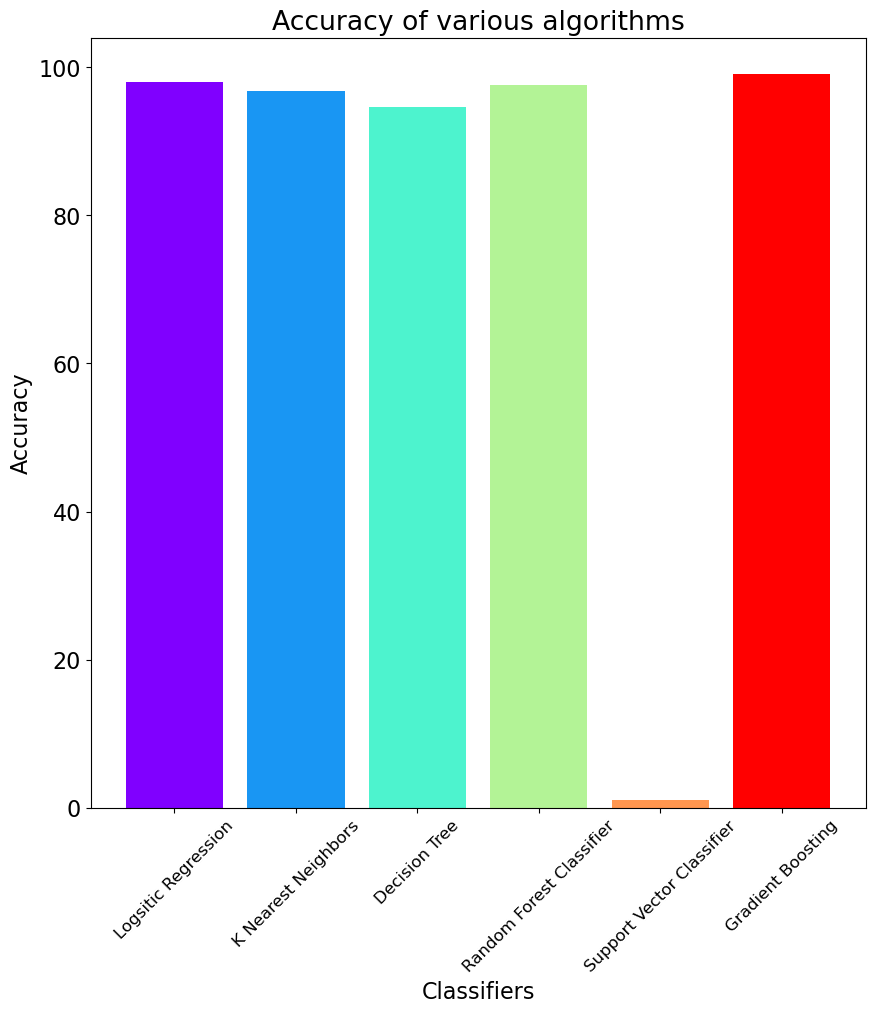

In [67]:
colors = plt.cm.rainbow(np.linspace(0, 1, 6))
labels = ['Logsitic Regression', 'K Nearest Neighbors','Decision Tree', 'Random Forest Classifier','Support Vector Classifier','Gradient Boosting']
plt.bar(labels, accuracy_scores, color = colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of various algorithms')
plt.xticks(rotation=45, fontsize=12)
plt.show()


In [68]:
# Feature selection with SelectKBest
k = 200
selector = SelectKBest(f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


selected_indices=selector.get_support(indices=True)
selected_features = X_train.columns[selected_indices]
print(len(selected_features))

200


In [69]:
# Wrapper Method

In [70]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier()

k=200
rfe_selector = RFE(estimator,n_features_to_select=k)
X_train_selected_rfe = rfe_selector.fit_transform(X_train_selected,y_train)
X_test_selected_rfe = rfe_selector.transform(X_test_selected)

selected_indices_rfe = rfe_selector.get_support(indices=True)
selected_features_rfe = selected_features[selected_indices_rfe]
print(selected_features_rfe)

print(len(selected_features_rfe))

rf = RandomForestClassifier()

rf.fit(X_train_selected_rfe,y_train)

y_pred_rf = rf.predict(X_test_selected_rfe)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_rf)

import joblib

joblib.dump(rf,"model_rfe")

joblib.dump(selector,"k_best_selector")

joblib.dump(rfe_selector,"rfe_selector")

data_test=data_test.drop("Activity",axis=1)

duplicated_columns = data_test.columns[data_test.T.duplicated()].to_list()

data_test = data_test.drop(duplicated_columns,axis=1)

model = joblib.load('model_rfe')

k_best_selector = joblib.load('k_best_selector')

rfe_selector = joblib.load('rfe_selector')

#selector=selector.transform(data_test)

# Transform the data using the loaded SelectKBest object
X_test_selected = k_best_selector.transform(data_test)

# Transform the data using the loaded RFE object
X_test_selected_rfe = rfe_selector.transform(X_test_selected)

#X_test_selected_rfe = rfe_selector.transform(selector)

y_pred = model.predict(X_test_selected_rfe)

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroMag-mad()', 'fBodyBodyGyroMag-max()',
       'fBodyBodyGyroMag-iqr()', 'fBodyBodyGyroMag-entropy()',
       'fBodyBodyGyroJerkMag-mean()', 'fBodyBodyGyroJerkMag-mad()',
       'fBodyBodyGyroJerkMag-iqr()', 'fBodyBodyGyroJerkMag-entropy()',
       'angle(X,gravityMean)', 'angle(Y,gravityMean)'],
      dtype='object', length=200)
200


In [71]:
# GUI

In [ ]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import joblib
from tkinter import messagebox

def open_file():
    filepath=filedialog.askopenfile(filetypes=[("CSV Files",".csv")])
    if filepath:
        try:
            data_train=pd.read_csv(filepath)
            process_data(data_train)
        except Exception as e:
            messagebox.showerror("Error",f"Failed to open file {e}")
            
def process_data(data_train):
    # Find columns with the same values
    #data= data.drop("Activity",axis=1)
    duplicated_columns = data_train.columns[data_train.T.duplicated()].tolist()
    # Remove columns with the same values
   
    data_test = data_train.drop(duplicated_columns, axis=1)
 
    model = joblib.load("model_rfe")
    # Load the SelectKBest object from the file
    selector = joblib.load('k_best_selector')
    rfe_selector = joblib.load('rfe_selector')
    
    # Transform the new data using the loaded SelectKBest object
    X_test_selected = selector.transform(data_test)
    
    # Transform the new data using the loaded RFE object
    X_test_selected_rfe = rfe_selector.transform(X_test_selected)
    y_pred=model.predict(X_test_selected_rfe)
    # standing : 0, sitting : 1,laying : 2, WALKING_DOWNSTAIRS: 3, 
    # walking_upstairs:4,walking : 5
    y_pred = pd.Series(y_pred)
    y_pred = y_pred.map({0: 'Standing',1:'Sitting',2:'Laying',
                        3: 'Walking_downstairs',4: 'Walking_upstairs',
                        5:"Walking"})
    data_train['Predicted_target']=y_pred
    save_file(data_train)

def save_file(data_train):
    savepath=filedialog.asksaveasfilename(defaultextension=".csv",
                              filetypes=[("CSV Files",".csv")])
    if savepath:
        try:
            data_train.to_csv(savepath)
            messagebox.showinfo("Success","File Saved Successfully")
        except Exception as e:
            messagebox.showerror("Error",f"Failed to save file:{e}")
            
    
# Create a Tkinter GUI

root = tk.Tk()

root.title("Classification")

root.geometry("300x300")

button1 = tk.Button(root,text="Open CSV File",
                   width=15,
                   height=2,
                   background="lightgreen",
                   activebackground="lightblue",
                   font=("Arial",11,"bold"),
                   command=open_file)

button1.pack(pady=50)

root.mainloop()